# <font color="red">classification du score crédit</font>

La problématique de classification de score crédit est un domaine crucial dans le secteur financier. Elle concerne la prédiction du risque de défaut de paiement d'un emprunteur sur un prêt ou une ligne de crédit. Cette tâche est essentielle pour les prêteurs afin de prendre des décisions éclairées sur l'octroi de créditLa problématique de classification de score crédit est un domaine crucial dans le secteur financier. Elle concerne la prédiction du risque de défaut de paiement d'un emprunteur sur un prêt ou une ligne de crédit. Cette tâche est essentielle pour les prêteurs afin de prendre des décisions éclairées sur l'octroi de crédit

##### signification de chaque colonne

ID	Identifiant unique d'un client

Customer_ID	Identifiant unique d'un client (correspond à ID)

Month	Mois

Name	Nom 

Age	Âge

SSN	Numéro de sécurité sociale (masqué pour des raisons de confidentialité)

Occupation	Profession

Annual_Income	Revenu annuel

Monthly_Inhand_Salary	Salaire mensuel net

Num_Bank_Accounts	Nombre de comptes bancaires

Num_Credit_Card	Nombre de cartes de crédit

Interest_Rate	Taux d'intérêt

Num_of_Loan	Nombre de prêts

Type_of_Loan	Type de prêt

Delay_from_due_date	Retard moyen par rapport à la date d'échéance (en jours)

Num_of_Delayed_Payment	Nombre moyen de retards de paiement

Changed_Credit_Limit	Variation du plafond de crédit (en pourcentage)

Num_Credit_Inquiries	Nombre de demandes de crédit

Credit_Mix	Composition du crédit

Outstanding_Debt	Dette impayée restante (en USD)

Credit_Utilization_Ratio	Taux d'utilisation du crédit

Credit_History_Age	Ancienneté de l'historique de crédit (en mois)

Payment_of_Min_Amount	Paiement du montant minimum seulement

Total_EMI_per_month	Montant mensuel des versements EMI (en USD)

Amount_invested_monthly	Montant mensuel investi par le client (en USD)

Payment_Behaviour	Comportement de paiement du client

Monthly_Balance	Solde mensuel du client (en USD)

Credit_Score	Catégorie de score de crédit (Faible, Moyen, Bon)

In [83]:
# lire le fichier csv
df <- read.csv("C:\\Users\\elabo\\Desktop\\R\\train.csv", header = TRUE, sep = ",",dec=".",stringsAsFactors = TRUE)


In [38]:
is.data.frame(df)

[1] TRUE

il s'agit d'une dataframe

In [39]:
#afficher les 6 1ère lignes:
head(df)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,⋯,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
1,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,26.82262,265,No,49.57495,21.46538,High_spent_Small_value_payments,312.4941,Good
2,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,31.94496,266,No,49.57495,21.46538,Low_spent_Large_value_payments,284.6292,Good
3,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,28.60935,267,No,49.57495,21.46538,Low_spent_Medium_value_payments,331.2099,Good
4,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,31.37786,268,No,49.57495,21.46538,Low_spent_Small_value_payments,223.4513,Good
5,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,24.79735,269,No,49.57495,21.46538,High_spent_Medium_value_payments,341.4892,Good
6,5639,3392,6,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843,3,⋯,Good,809.98,27.26226,270,No,49.57495,21.46538,High_spent_Medium_value_payments,340.4792,Good


In [40]:
#afficher les noms des lignes de df
row.names(df)

[1] "1"      "2"      "3"      "4"      "5"      "6"      "7"      "8"     
     [9] "9"      "10"     "11"     "12"     "13"     "14"     "15"     "16"    
    [17] "17"     "18"     "19"     "20"     "21"     "22"     "23"     "24"    
    [25] "25"     "26"     "27"     "28"     "29"     "30"     "31"     "32"    
    [33] "33"     "34"     "35"     "36"     "37"     "38"     "39"     "40"    
    [41] "41"     "42"     "43"     "44"     "45"     "46"     "47"     "48"    
    [49] "49"     "50"     "51"     "52"     "53"     "54"     "55"     "56"    
    [57] "57"     "58"     "59"     "60"     "61"     "62"     "63"     "64"    
    [65] "65"     "66"     "67"     "68"     "69"     "70"     "71"     "72"    
    [73] "73"     "74"     "75"     "76"     "77"     "78"     "79"     "80"    
    [81] "81"     "82"     "83"     "84"     "85"     "86"     "87"     "88"    
    [89] "89"     "90"     "91"     "92"     "93"     "94"     "95"     "96"    
    [97] "97"     "98"     "99"     "100"    "101"    "102"    "103"    "104"   
   [105] "105"    "106"    "107"    "108"    "109"    "110"    "111"    "112"   
   [113] "113"    "114"    "115"    "116"    "117"    "118"    "119"    "120"   
   [121] "121"    "122"    "123"    "124"    "125"    "126"    "127"    "128"   
   [129] "129"    "130"    "131"    "132"    "133"    "134"    "135"    "136"   
   [137] "137"    "138"    "139"    "140"    "141"    "142"    "143"    "144"   
   [145] "145"    "146"    "147"    "148"    "149"    "150"    "151"    "152"   
   [153] "153"    "154"    "155"    "156"    "157"    "158"    "159"    "160"   
   [161] "161"    "162"    "163"    "164"    "165"    "166"    "167"    "168"   
   [169] "169"    "170"    "171"    "172"    "173"    "174"    "175"    "176"   
   [177] "177"    "178"    "179"    "180"    "181"    "182"    "183"    "184"   
   [185] "185"    "186"    "187"    "188"    "189"    "190"    "191"    "192"   
   [193] "193"    "194"    "195"    "196"    "197"    "198"    "199"    "200"   
   [201] "201"    "202"    "203"    "204"    "205"    "206"    "207"    "208"   
   [209] "209"    "210"    "211"    "212"    "213"    "214"    "215"    "216"   
   [217] "217"    "218"    "219"    "220"    "221"    "222"    "223"    "224"   
   [225] "225"    "226"    "227"    "228"    "229"    "230"    "231"    "232"   
   [233] "233"    "234"    "235"    "236"    "237"    "238"    "239"    "240"   
   [241] "241"    "242"    "243"    "244"    "245"    "246"    "247"    "248"   
   [249] "249"    "250"    "251"    "252"    "253"    "254"    "255"    "256"   
   [257] "257"    "258"    "259"    "260"    "261"    "262"    "263"    "264"   
   [265] "265"    "266"    "267"    "268"    "269"    "270"    "271"    "272"   
   [273] "273"    "274"    "275"    "276"    "277"    "278"    "279"    "280"   
   [281] "281"    "282"    "283"    "284"    "285"    "286"    "287"    "288"   
   [289] "289"    "290"    "291"    "292"    "293"    "294"    "295"    "296"   
   [297] "297"    "298"    "299"    "300"    "301"    "302"    "303"    "304"   
   [305] "305"    "306"    "307"    "308"    "309"    "310"    "311"    "312"   
   [313] "313"    "314"    "315"    "316"    "317"    "318"    "319"    "320"   
   [321] "321"    "322"    "323"    "324"    "325"    "326"    "327"    "328"   
   [329] "329"    "330"    "331"    "332"    "333"    "334"    "335"    "336"   
   [337] "337"    "338"    "339"    "340"    "341"    "342"    "343"    "344"   
   [345] "345"    "346"    "347"    "348"    "349"    "350"    "351"    "352"   
   [353] "353"    "354"    "355"    "356"    "357"    "358"    "359"    "360"   
   [361] "361"    "362"    "363"    "364"    "365"    "366"    "367"    "368"   
   [369] "369"    "370"    "371"    "372"    "373"    "374"    "375"    "376"   
   [377] "377"    "378"    "379"    "380"    "381"    "382"    "383"    "384"   
   [385] "385"    "386"    "387"    "388"    "389"    "390"    "391"    "392"   
   [393] "393"    "394"    "395"    

In [41]:
#afficher les noms des colonnes de df
names(df)

[1] "ID"                       "Customer_ID"             
 [3] "Month"                    "Name"                    
 [5] "Age"                      "SSN"                     
 [7] "Occupation"               "Annual_Income"           
 [9] "Monthly_Inhand_Salary"    "Num_Bank_Accounts"       
[11] "Num_Credit_Card"          "Interest_Rate"           
[13] "Num_of_Loan"              "Type_of_Loan"            
[15] "Delay_from_due_date"      "Num_of_Delayed_Payment"  
[17] "Changed_Credit_Limit"     "Num_Credit_Inquiries"    
[19] "Credit_Mix"               "Outstanding_Debt"        
[21] "Credit_Utilization_Ratio" "Credit_History_Age"      
[23] "Payment_of_Min_Amount"    "Total_EMI_per_month"     
[25] "Amount_invested_monthly"  "Payment_Behaviour"       
[27] "Monthly_Balance"          "Credit_Score"

In [42]:
#les dimensions de df
dim(df)

[1] 100000     28

cette dataset contient 100000 lignes et 28 colonnes

In [43]:
str(df)

'data.frame':	100000 obs. of  28 variables:
 $ ID                      : int  5634 5635 5636 5637 5638 5639 5640 5641 5646 5647 ...
 $ Customer_ID             : int  3392 3392 3392 3392 3392 3392 3392 3392 8625 8625 ...
 $ Month                   : int  1 2 3 4 5 6 7 8 1 2 ...
 $ Name                    : Factor w/ 10128 levels "a Coopert","a Maxwella",..: 14 14 14 14 14 14 14 14 7814 7814 ...
 $ Age                     : num  23 23 23 23 23 23 23 23 28 28 ...
 $ SSN                     : num  8.21e+08 8.21e+08 8.21e+08 8.21e+08 8.21e+08 ...
 $ Occupation              : Factor w/ 15 levels "Accountant","Architect",..: 13 13 13 13 13 13 13 13 14 14 ...
 $ Annual_Income           : num  19114 19114 19114 19114 19114 ...
 $ Monthly_Inhand_Salary   : num  1825 1825 1825 1825 1825 ...
 $ Num_Bank_Accounts       : num  3 3 3 3 3 3 3 3 2 2 ...
 $ Num_Credit_Card         : num  4 4 4 4 4 4 4 4 4 4 ...
 $ Interest_Rate           : num  3 3 3 3 3 3 3 3 6 6 ...
 $ Num_of_Loan             : num  4

on remarque la présence des variables qualitatives et aussi quantitatives

### Analyse univarié

In [44]:
summary(df)

       ID          Customer_ID        Month                          Name      
 Min.   :  5634   Min.   : 1006   Min.   :1.00   Jessicad              :   48  
 1st Qu.: 43133   1st Qu.:13664   1st Qu.:2.75   Langep                :   48  
 Median : 80632   Median :25777   Median :4.50   Stevex                :   48  
 Mean   : 80632   Mean   :25983   Mean   :4.50   Andreaj               :   40  
 3rd Qu.:118130   3rd Qu.:38385   3rd Qu.:6.25   Caroline Valetkevitchj:   40  
 Max.   :155629   Max.   :50999   Max.   :8.00   Danielz               :   40  
                                                 (Other)               :99736  
      Age             SSN                 Occupation    Annual_Income   
 Min.   :14.00   Min.   :    81349   Lawyer    : 7096   Min.   :  7006  
 1st Qu.:24.00   1st Qu.:245168577   Engineer  : 6864   1st Qu.: 19343  
 Median :33.00   Median :500688612   Architect : 6824   Median : 37000  
 Mean   :33.32   Mean   :500461680   Mechanic  : 6776   Mean   : 505

Age:arge tranche d'âge des clients (14 à 56 ans), salaire médian proche de la moyenne, concentration des âges vers la tranche inférieure.


Annual_Income:Écart important des revenus (7 006 à 179 987), salaire médian proche de la moyenne, concentration des revenus plus bas.

Interprétation :

Ces statistiques permettent aux banques de comprendre la démographie de leur clientèle et d'adapter leurs produits et services en conséquence. Elles peuvent également être utiles pour l'évaluation du risque de crédit et le développement de stratégies marketing ciblées.

In [45]:
summary(df$Annual_Income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7006   19343   37000   50505   71683  179987 

Écart de salaire important: Les salaires annuels varient de 7 006 à 179 987, indiquant une grande disparité des revenus parmi les employés.

Salaire médian proche de la moyenne: Le salaire médian (37 000) est proche de la moyenne (50 505), suggérant une distribution relativement symétrique des salaires.

Premier et troisième quartile: 25% des employés gagnent moins de 19 343 par an et 75% gagnent moins de 71 683 par an.

Concentration des salaires bas: Le premier quartile étant inférieur à la moitié de la moyenne, il y a une concentration des salaires bas.

Diversité des revenus: La distribution des salaires montre une diversité des revenus parmi les employés, avec un groupe important ayant des salaires relativement bas et un autre groupe ayant des salaires plus élevés.


#### <font color="blue">Analyse des variables quantitatives</font>

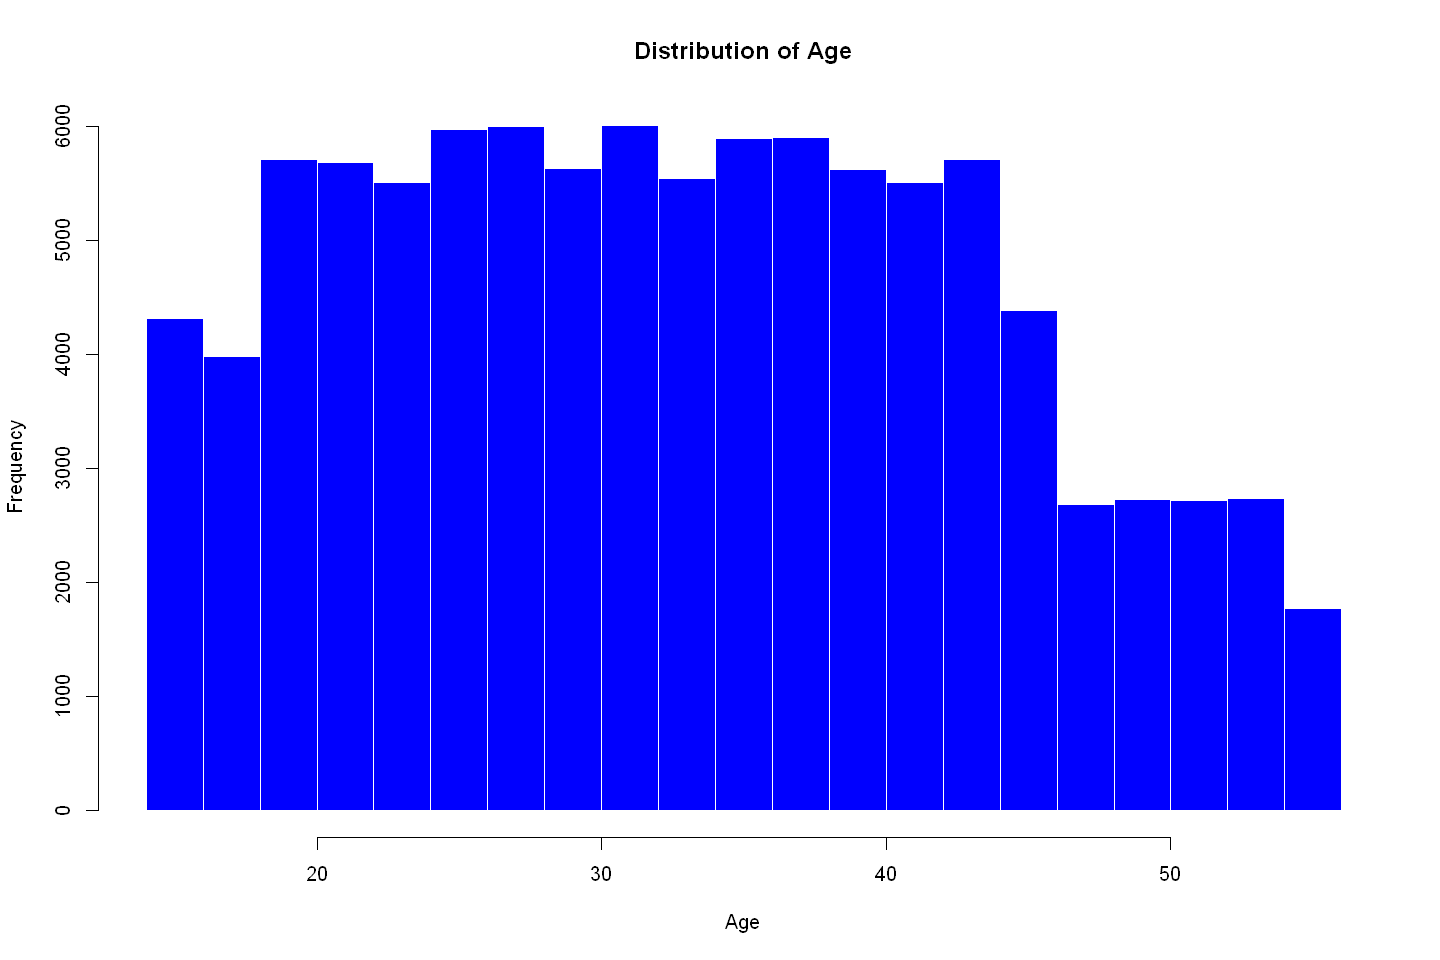

In [46]:
hist(df$Age, main="Distribution of Age", xlab="Age",col="blue",border="white")

 cet histogramme est un peu Asymétrique à droite: la majorité des valeurs se situent à gauche de la moyenne.Ainsi il ya une concentration d'age chez les jeunes

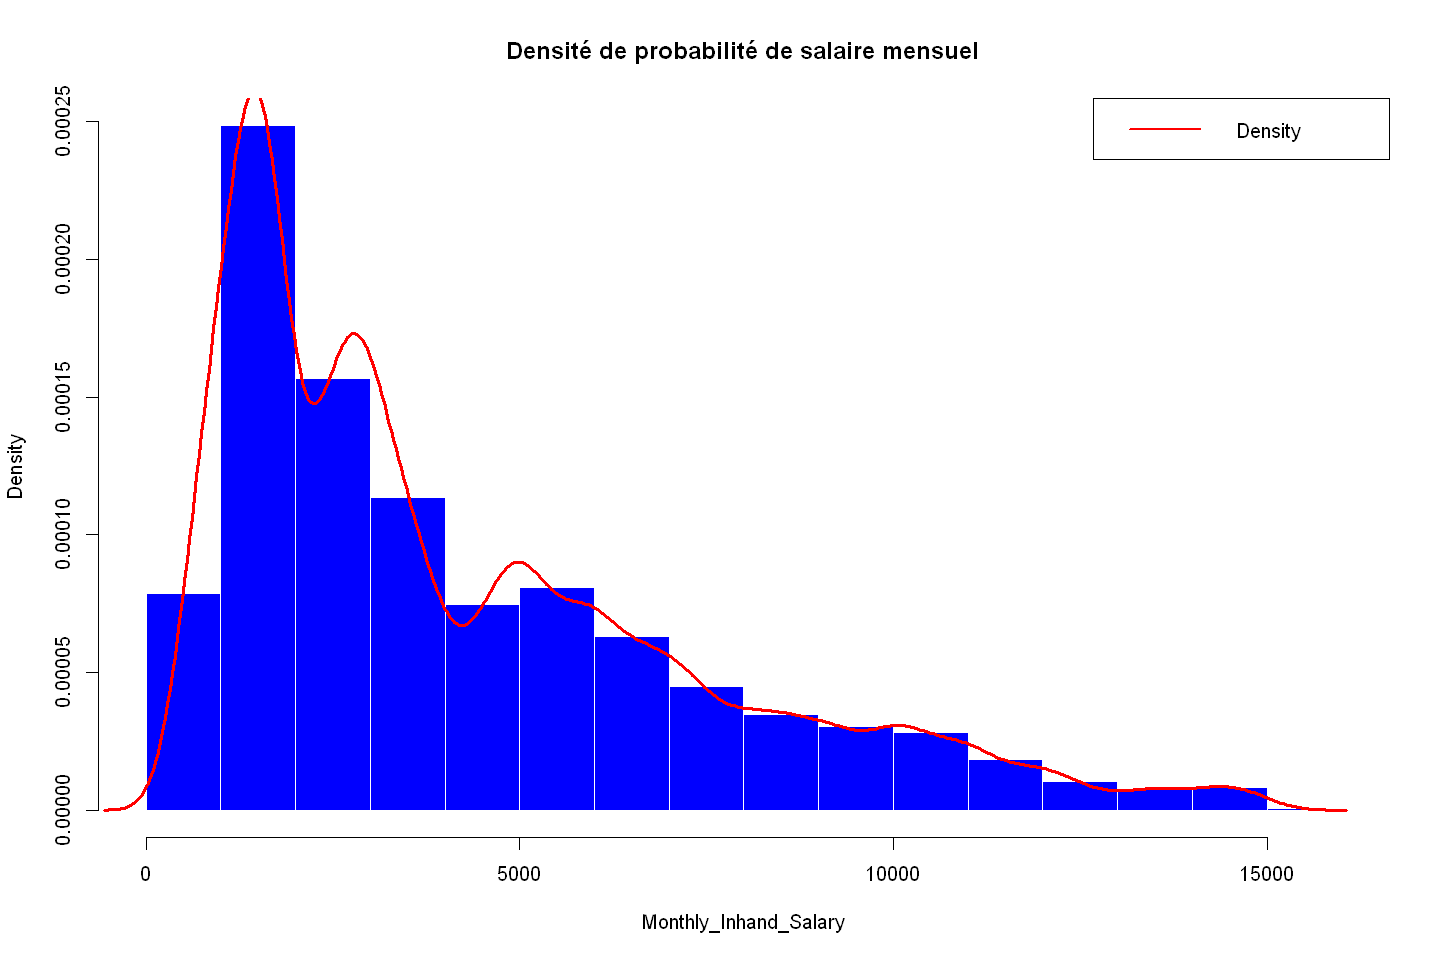

In [47]:
hist(df$Monthly_Inhand_Salary, main="Densité de probabilité de salaire mensuel", xlab="Monthly_Inhand_Salary",col="blue",border="white",prob=T)
lines(density(df$Monthly_Inhand_Salary), lwd=3, col = "red" )
legend("topright", legend = "Density", col = "red", lwd = 2)

cet histogramme  Asymétrique à droite: la majorité des valeurs se situent à gauche de la moyenne.Ainsi la mjorité des salaires sont inférieurs à 5000 dollars

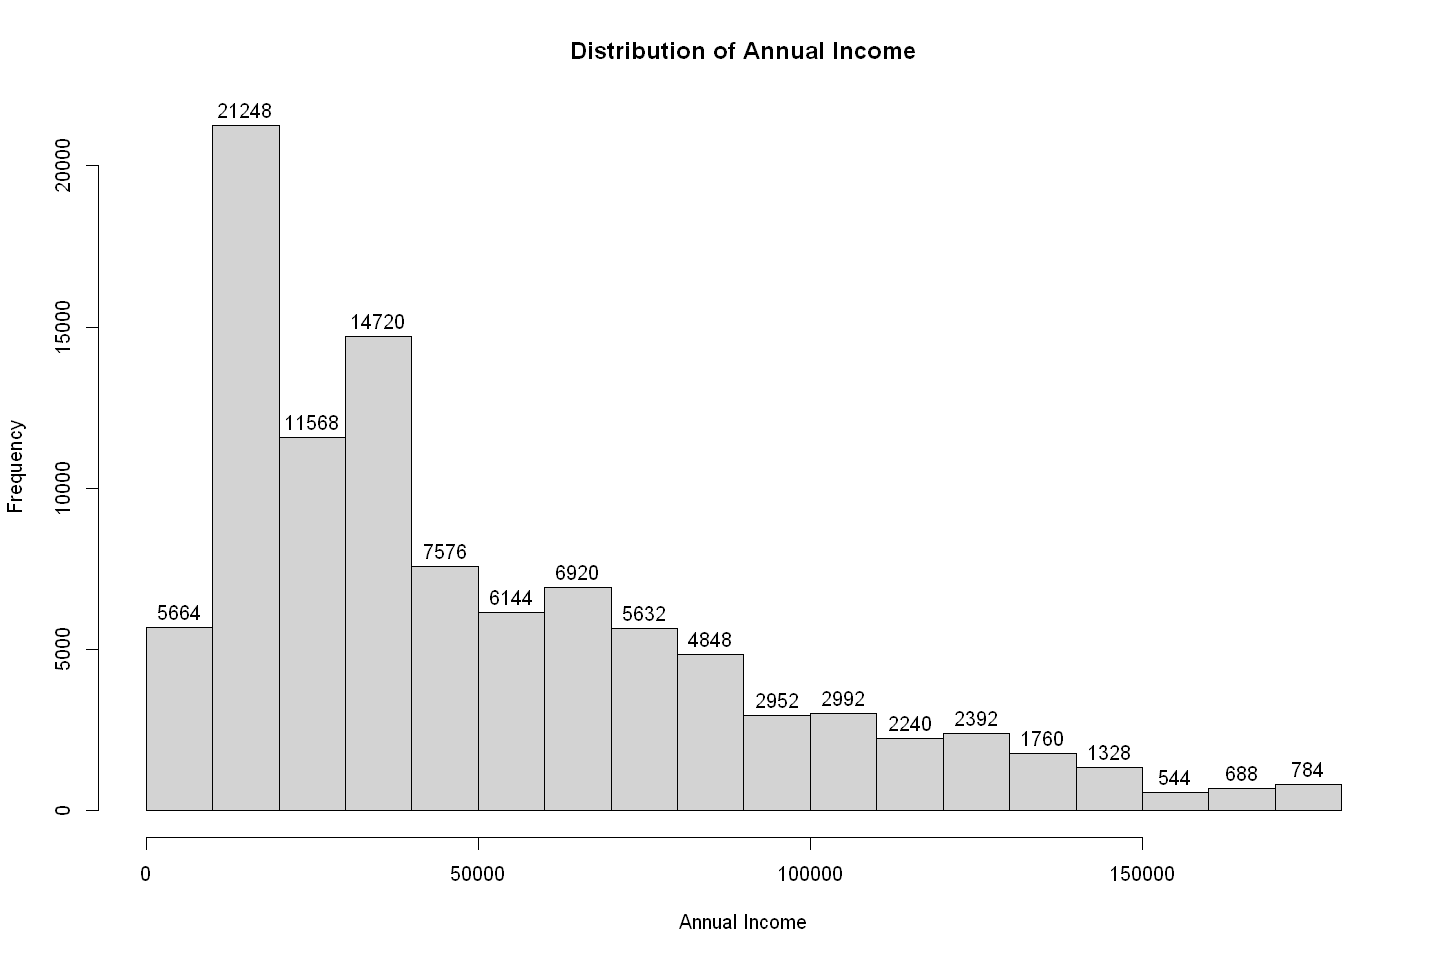

In [48]:
hist(df$Annual_Income, main="Distribution of Annual Income", xlab="Annual Income",labels=T)

il ya 544+688+784=2016 personnes ayant un revenue annuel supérieur à 150000 dollars qui sont une minorité

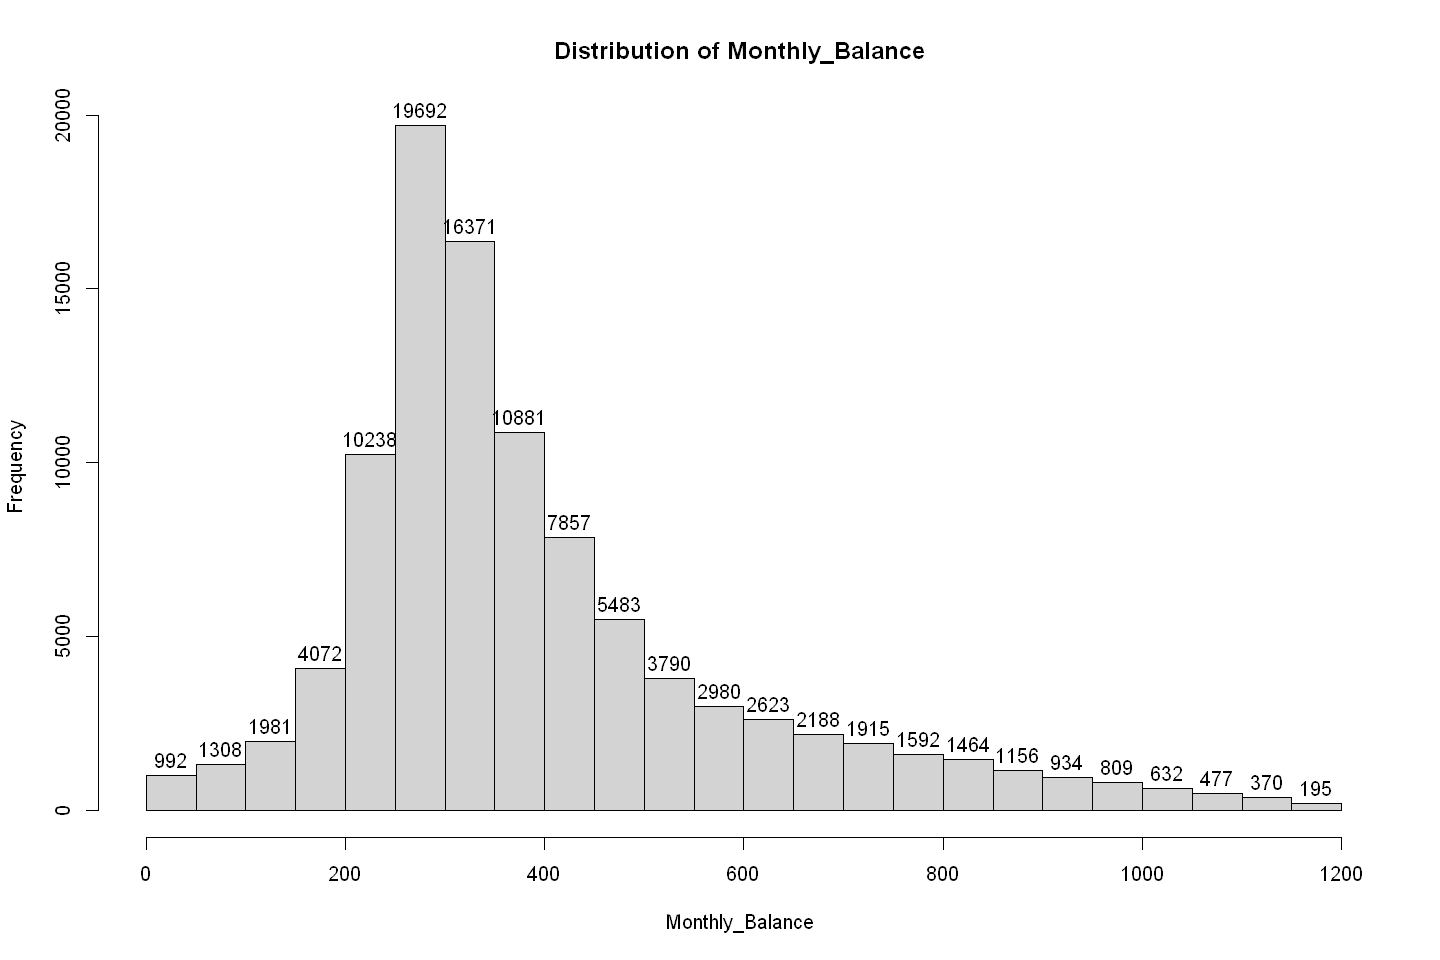

In [49]:
hist(df$Monthly_Balance, main="Distribution of Monthly_Balance ", xlab="Monthly_Balance ",labels=T)

Unimodalité: L'histogramme présente une seule pointe ou mode, située approximativement autour 300 dollars. Cela indique que la distribution des soldes mensuels est concentrée autour de cette valeur moyenne.

Symétrie: L'histogramme semble présenter une certaine symétrie approximative. Les deux moitiés de l'histogramme paraissent se refléter l'une l'autre, suggérant que les soldes mensuels se distribuent de manière relativement équilibrée autour de la moyenne.

Asymétrie légère: On peut observer une légère tendance à l'asymétrie vers la droite. La queue droite de l'histogramme semble s'étendre un peu plus que la queue gauche. Cela suggère que les soldes mensuels pourraient avoir une légère tendance à s'élever au-dessus de la moyenne.

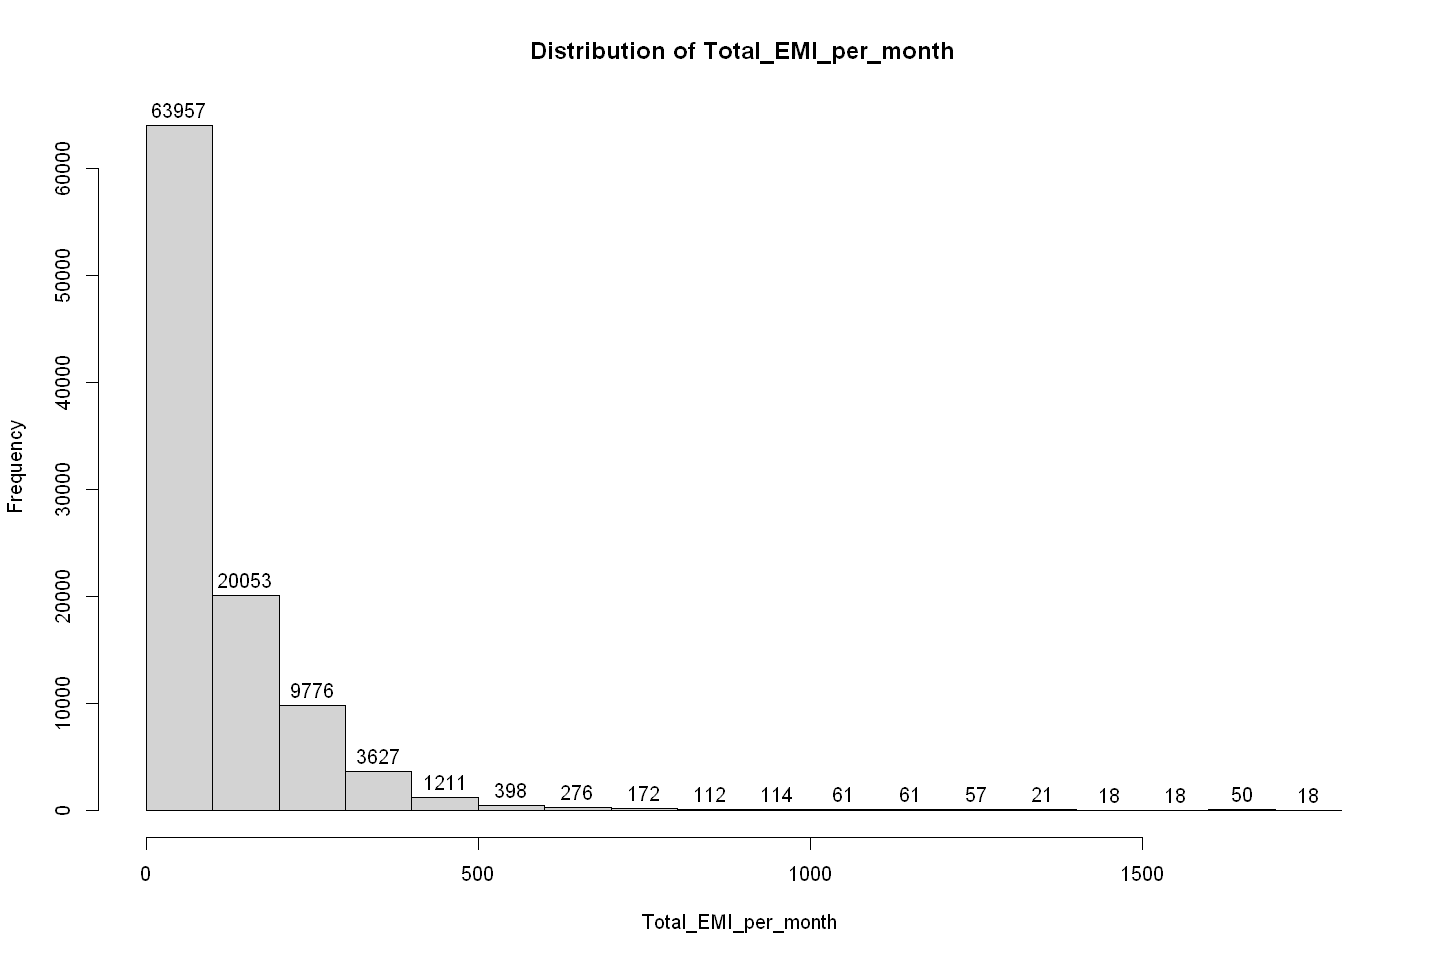

In [50]:
hist(df$Total_EMI_per_month, main="Distribution of Total_EMI_per_month", xlab="Total_EMI_per_month ",labels=T)

L'histogramme présenté illustre la distribution des paiements EMI mensuels totaux ("Total_EMI_per_month"), qui représentent vraisemblablement le montant total des mensualités d'emprunt que les individus versent pour leurs prêts. En observant attentivement sa forme, on peut déduire les caractéristiques suivantes :

Unimodalité: L'histogramme présente un seul pic ou mode, centré autour de 2000. Cela indique que la distribution des paiements EMI est concentrée autour de cette valeur moyenne.

Asymétrie: L'histogramme semble présenter une certaine asymétrie, en particulier vers le côté droit. La queue droite de la distribution semble s'étendre plus loin que la queue gauche. Cela suggère qu'il pourrait y avoir une légère tendance pour les paiements EMI à être plus élevés que la moyenne.

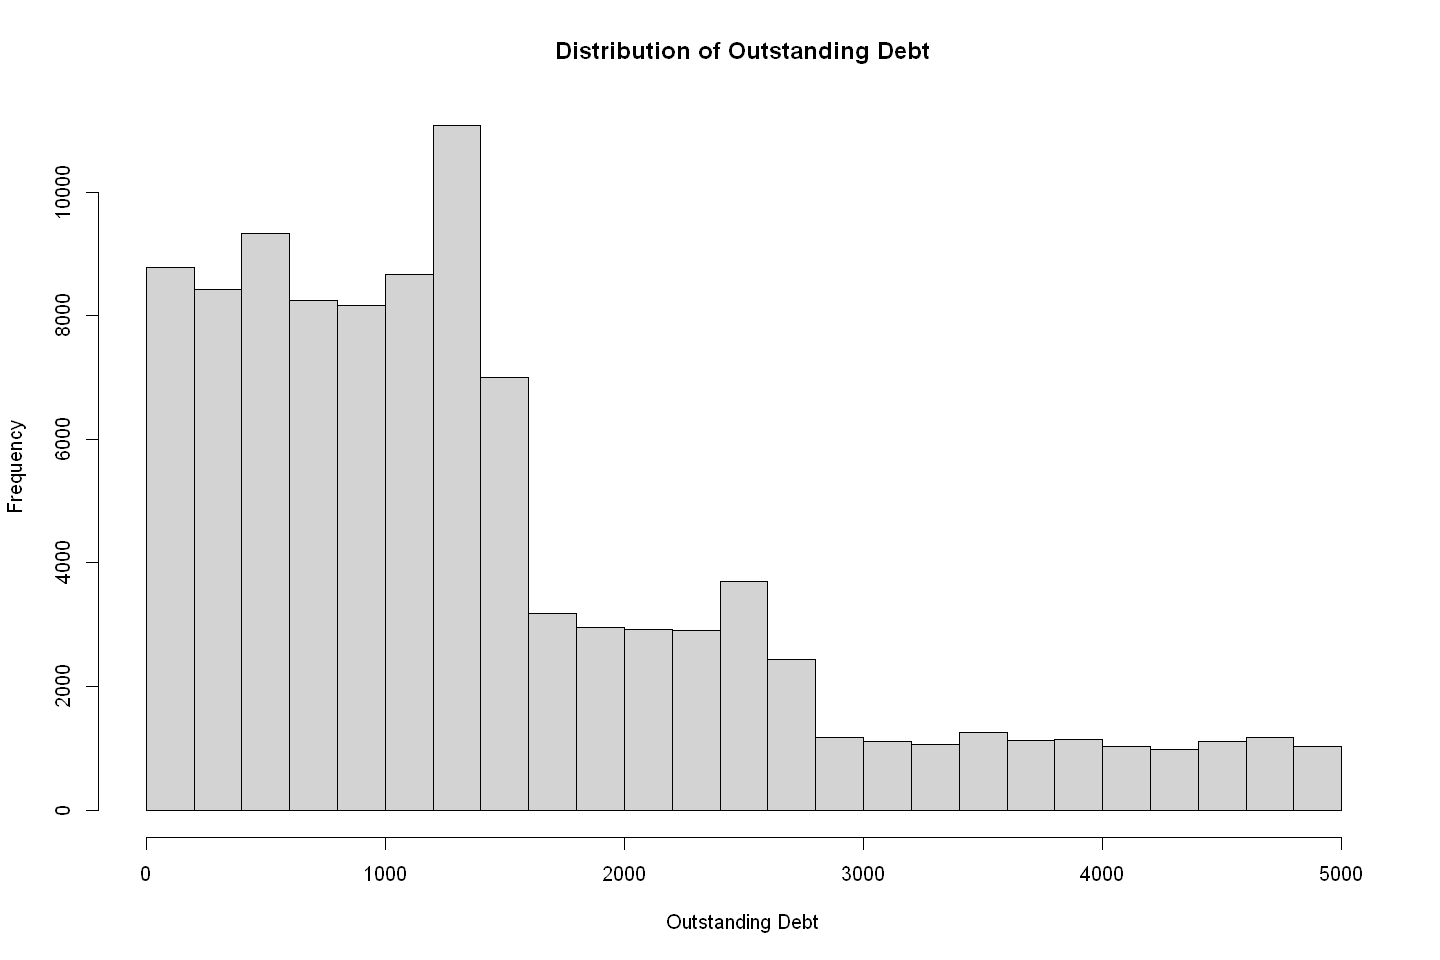

In [51]:
hist(df$Outstanding_Debt, main="Distribution of Outstanding Debt", xlab="Outstanding Debt")

L'histogramme présenté illustre la répartition des dettes impayées individuelles, qui représentent le montant d'argent que les personnes doivent à leurs créanciers. En observant attentivement sa forme, on peut déduire les caractéristiques suivantes :

Unimodalité: L'histogramme présente un seul pic ou mode, centré autour de 1000. Cela indique que la distribution des dettes impayées est concentrée autour de cette valeur moyenne.

Asymétrie: L'histogramme semble présenter une certaine asymétrie, en particulier vers le côté droit. La queue droite de la distribution semble s'étendre plus loin que la queue gauche. Cela suggère qu'il pourrait y avoir une légère tendance pour les montants des dettes impayées à être supérieurs à la moyenne.

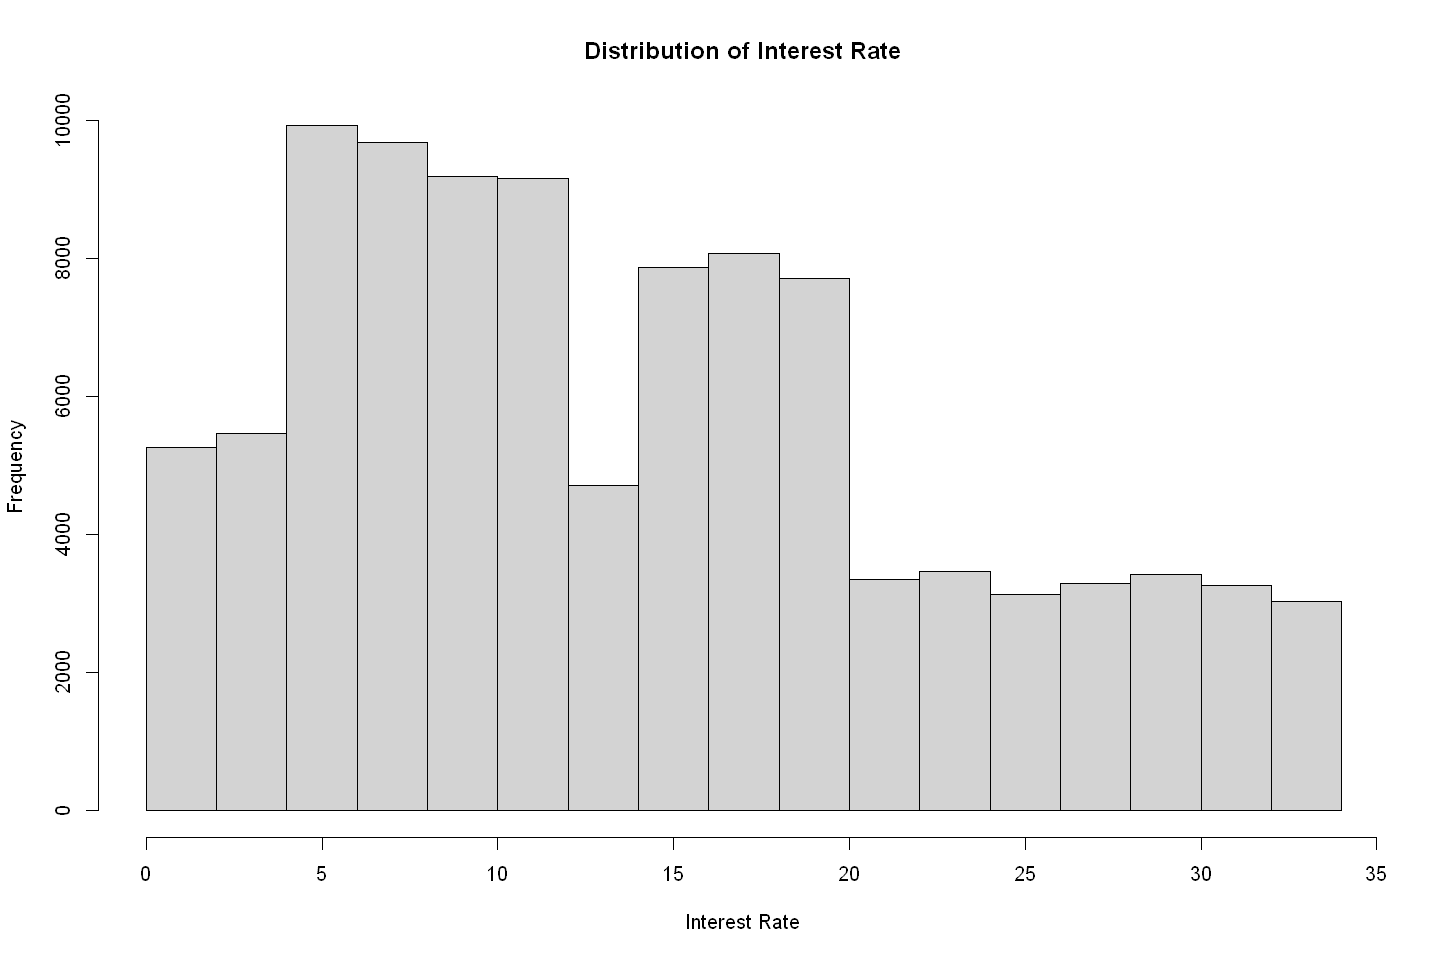

In [52]:
hist(df$Interest_Rate, main="Distribution of Interest Rate", xlab="Interest Rate")

 cette histogramme est multimodale non uniforme, il présente 2 pics (5-10) et (14-20)

#### <font color="blue">Analyse des variables qualitatives</font>

In [53]:
table(df$Credit_Mix)


     Bad     Good Standard 
   23768    30384    45848 

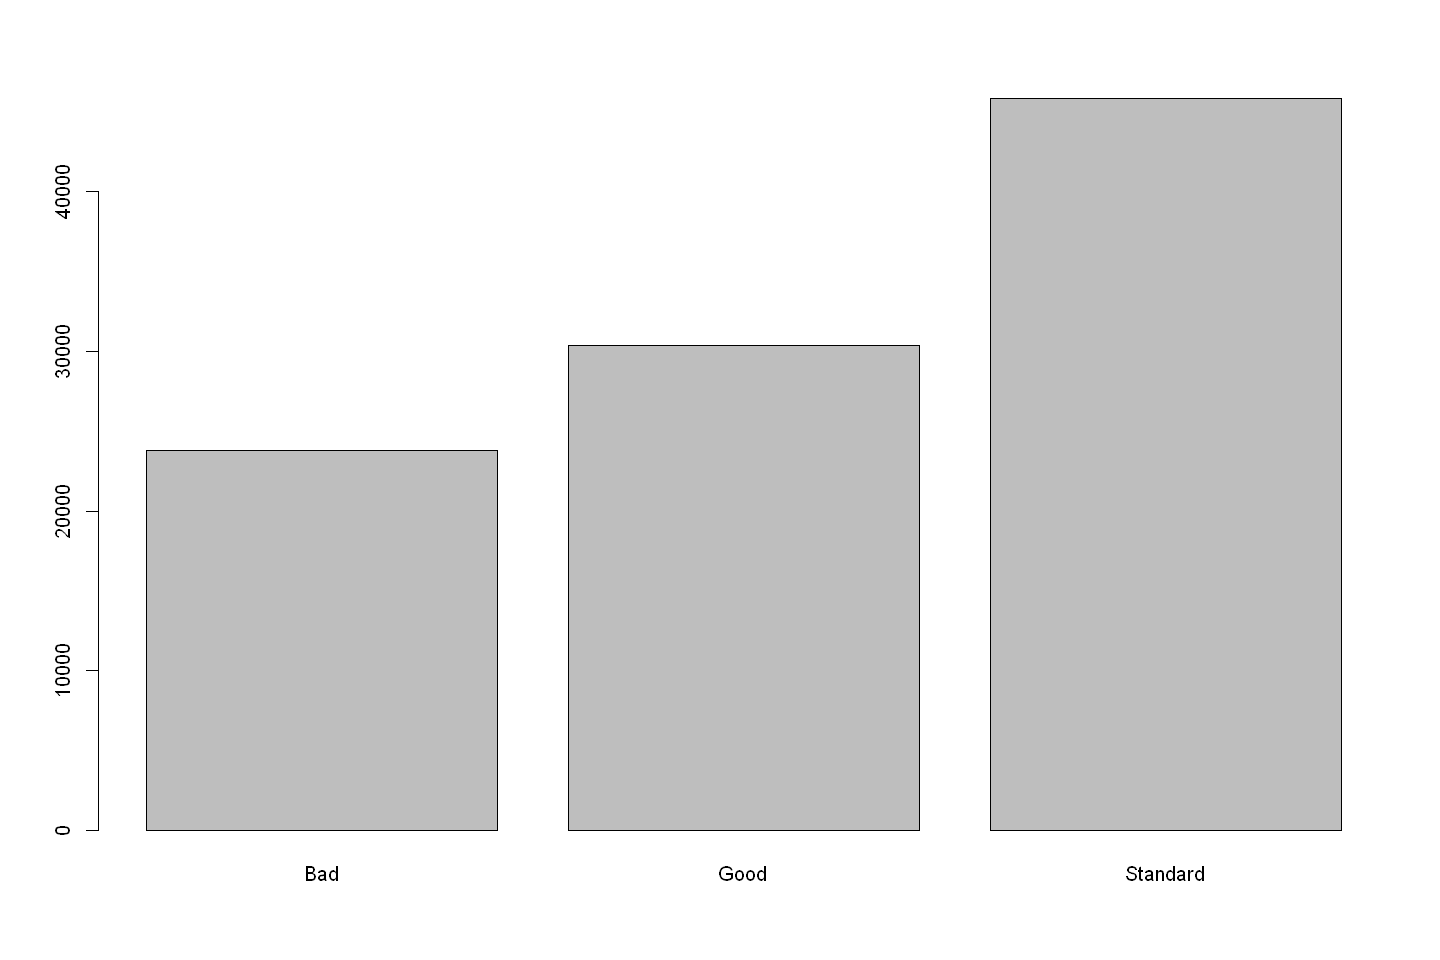

In [54]:
barplot(table(df$Credit_Mix))

rappel: le Credit_Mix a pour objectif d'Évaluer la diversité du crédit qu'un individu gère, indiquant sa capacité à gérer différents types de dettes.

la majorité des clients gère différents types de crédits de manière standard et plus de manière bonne . cequi est un bon signe

In [55]:
#table de contingence
table(df$Occupation)


   Accountant     Architect     Developer        Doctor      Engineer 
         6744          6824          6720          6568          6864 
 Entrepreneur    Journalist        Lawyer       Manager      Mechanic 
         6648          6536          7096          6432          6776 
Media_Manager      Musician     Scientist       Teacher        Writer 
         6720          6352          6744          6672          6304 

on remarque que dans notre dataset , il n'ya pas une grandre différence entre la répartition de nombre des personnes dans chaque métier .mais il semble que le nombre des avocats est le plus grand

In [56]:
# Installer et charger la bibliothèque 'plotrix'
install.packages("plotrix")
library(plotrix)

Warning message:
"le package 'plotrix' est en cours d'utilisation et ne sera pas installé"


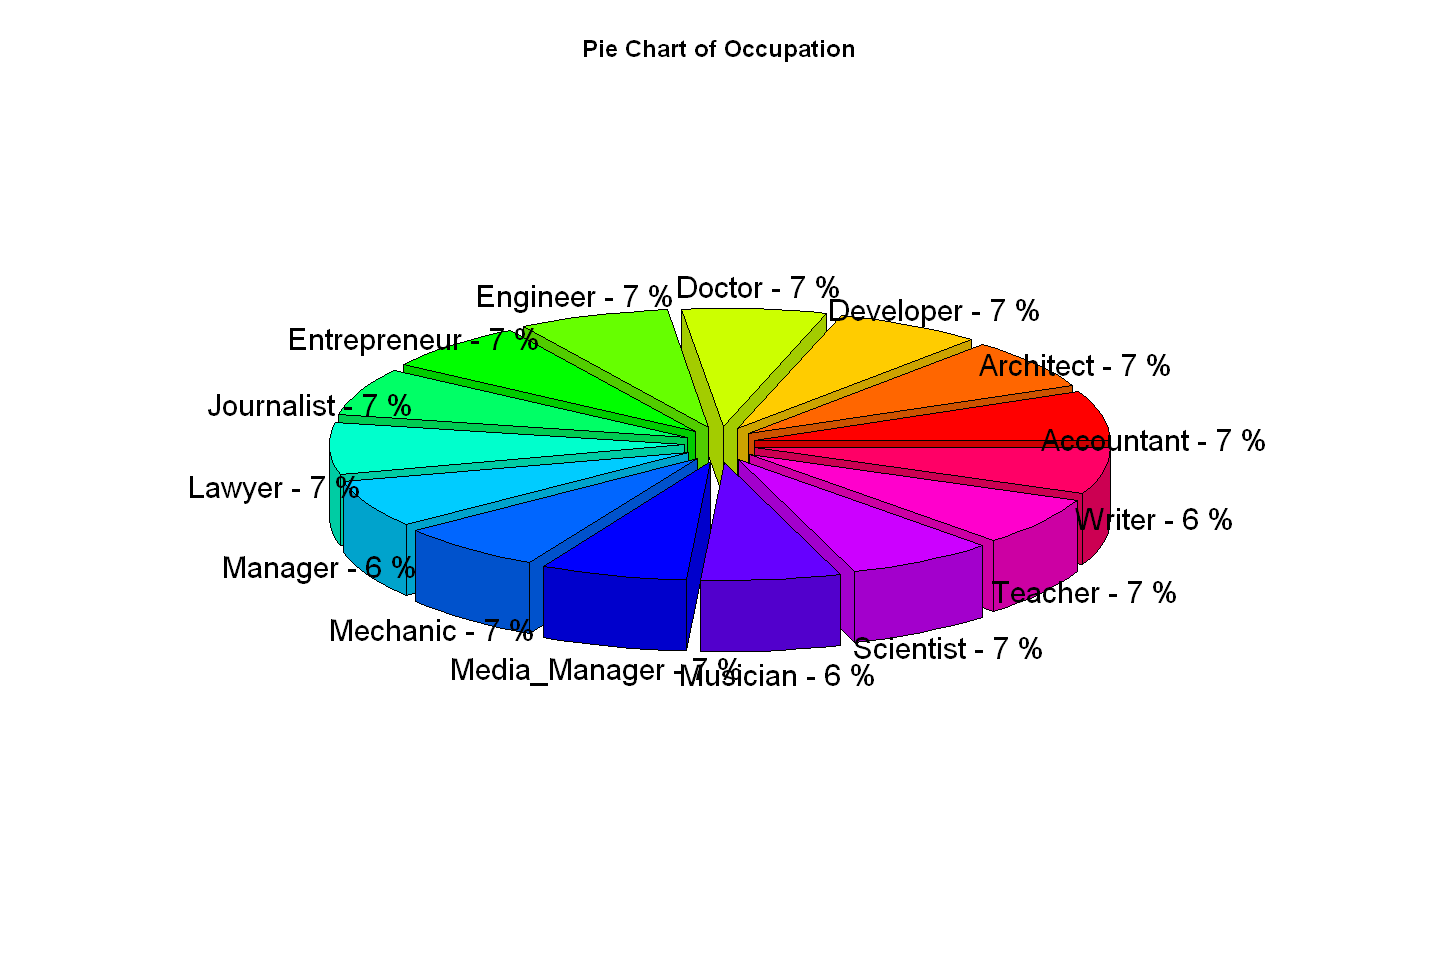

In [57]:
# Calculer les fréquences de chaque catégorie d'occupation
a <- table(df$Occupation)

# Extraire les niveaux de la variable Occupation
b <- levels(factor(df$Occupation))

# Tracer le diagramme circulaire en 3D
pie3D(a, explode = 0.1, main = "Pie Chart of Occupation", labels = paste(b, "-", round((a/sum(a))*100), "%"))


les occupations telles que doctor, lawyer, etc., ont des fréquences similaires, le diagramme en secteurs montre des secteurs de taille similaire pour chaque catégorie. Cela signifie que chaque catégorie représente à peu près le même pourcentage de l'ensemble des occupations.

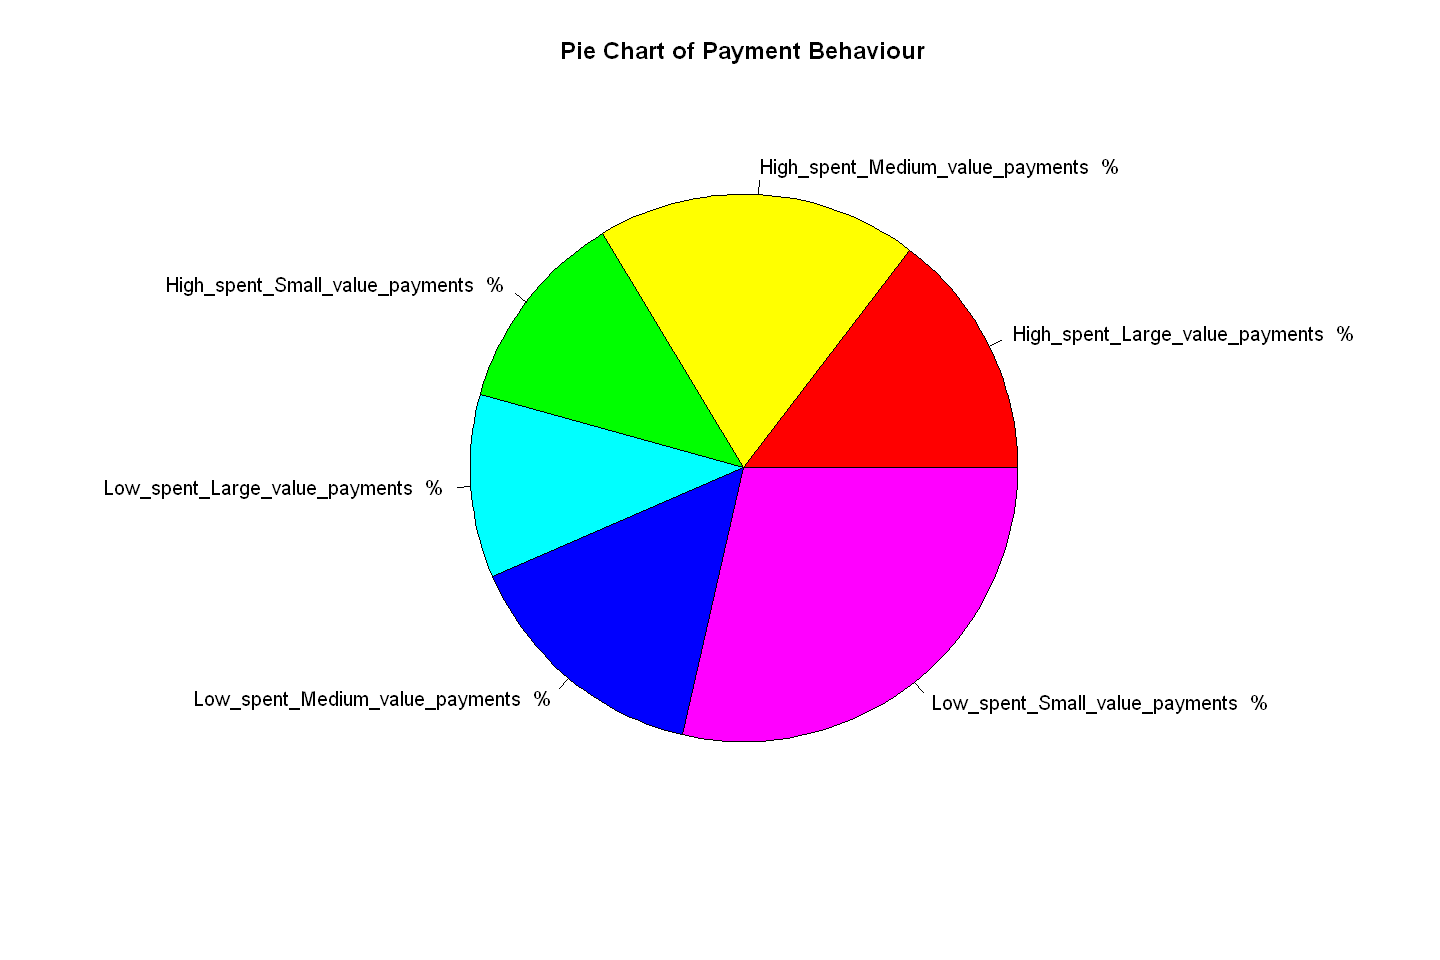

In [58]:
options(repr.plot.width=12, repr.plot.height=8)
q=(levels(factor(df$Payment_Behaviour)))
r = c (table (factor (df$Payment_Behaviour)))
prc= (r/nrow (data))*100
pie (table (df$Payment_Behaviour), col = rainbow(length (q)),labels = paste(q,prc,"%"),main="Pie Chart of Payment Behaviour")

nous observons que le comportement de paiement "low_spent_small_value_payments" a le plus grand pourcentage, suivi par "high_spent_medium_value_payments", "high_spent_large_value_payments", "medium_value_payments", "small_value_payments" et "large_value_payments".

Cela suggère que dans l'ensemble de données, la majorité des individus ont des comportements de paiement qui correspondent à des dépenses relativement faibles et à des valeurs de paiement plus petites. En revanche, les comportements de paiement associés à des dépenses plus élevées et à des valeurs de paiement plus grandes sont moins fréquents.

Cette visualisation pourrait indiquer des tendances intéressantes en matière de comportement de paiement dans l'ensemble de données, ce qui pourrait être exploré davantage pour mieux comprendre les habitudes de paiement des individus et potentiellement identifier des segments de clients ou des schémas de comportement spécifiques.

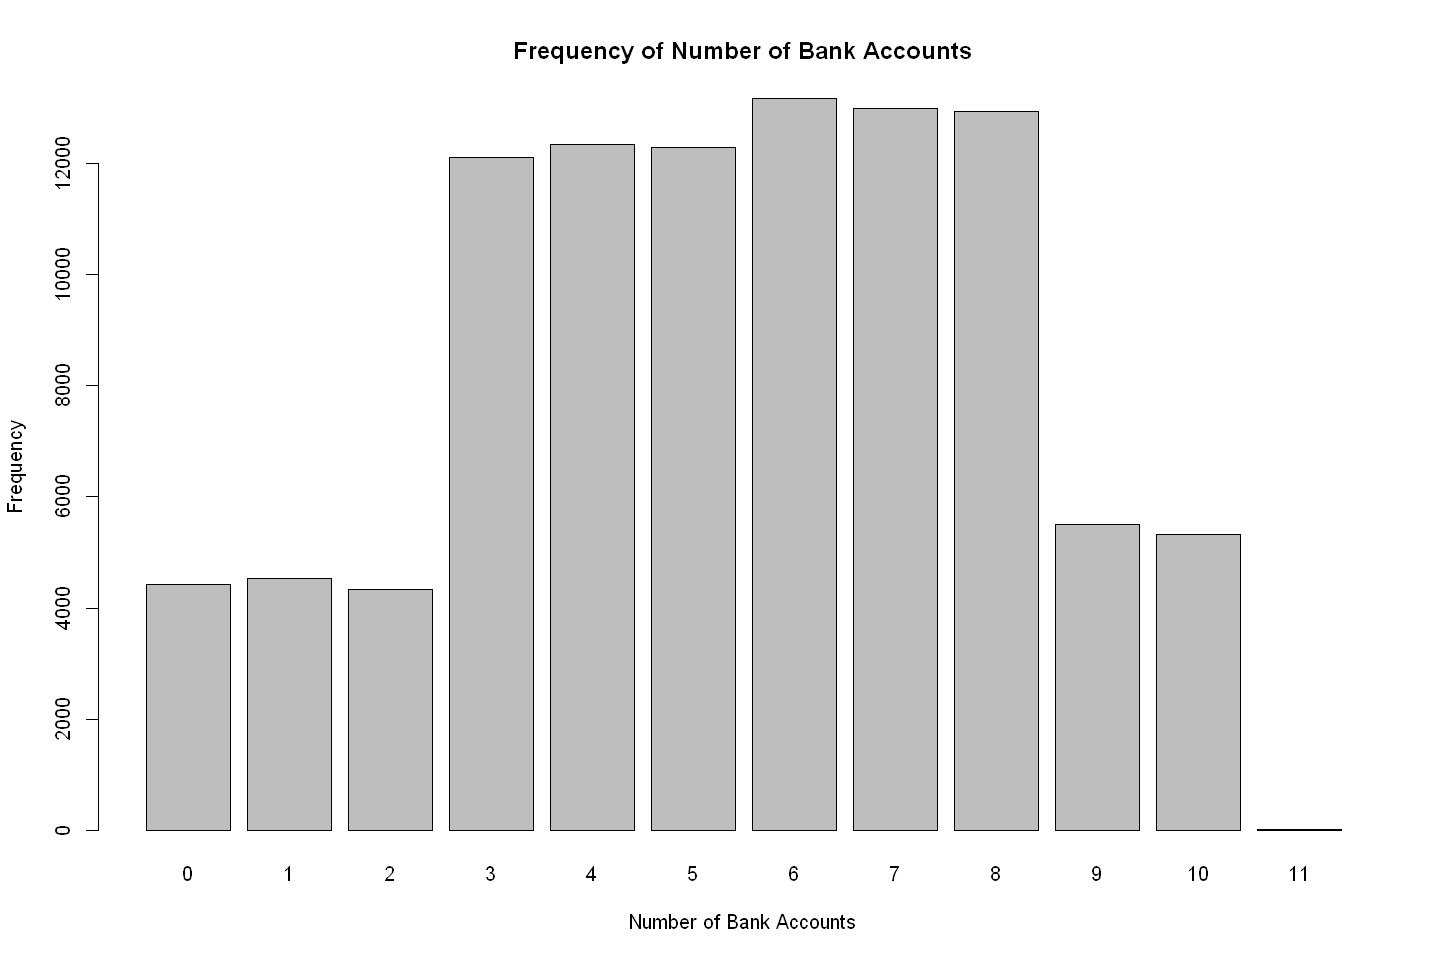

In [59]:
barplot(table(df$Num_Bank_Accounts), 
        main="Frequency of Number of Bank Accounts", 
        xlab="Number of Bank Accounts", 
        ylab="Frequency")

la majorité des clients possède de 3 à 8 comptes banquaires

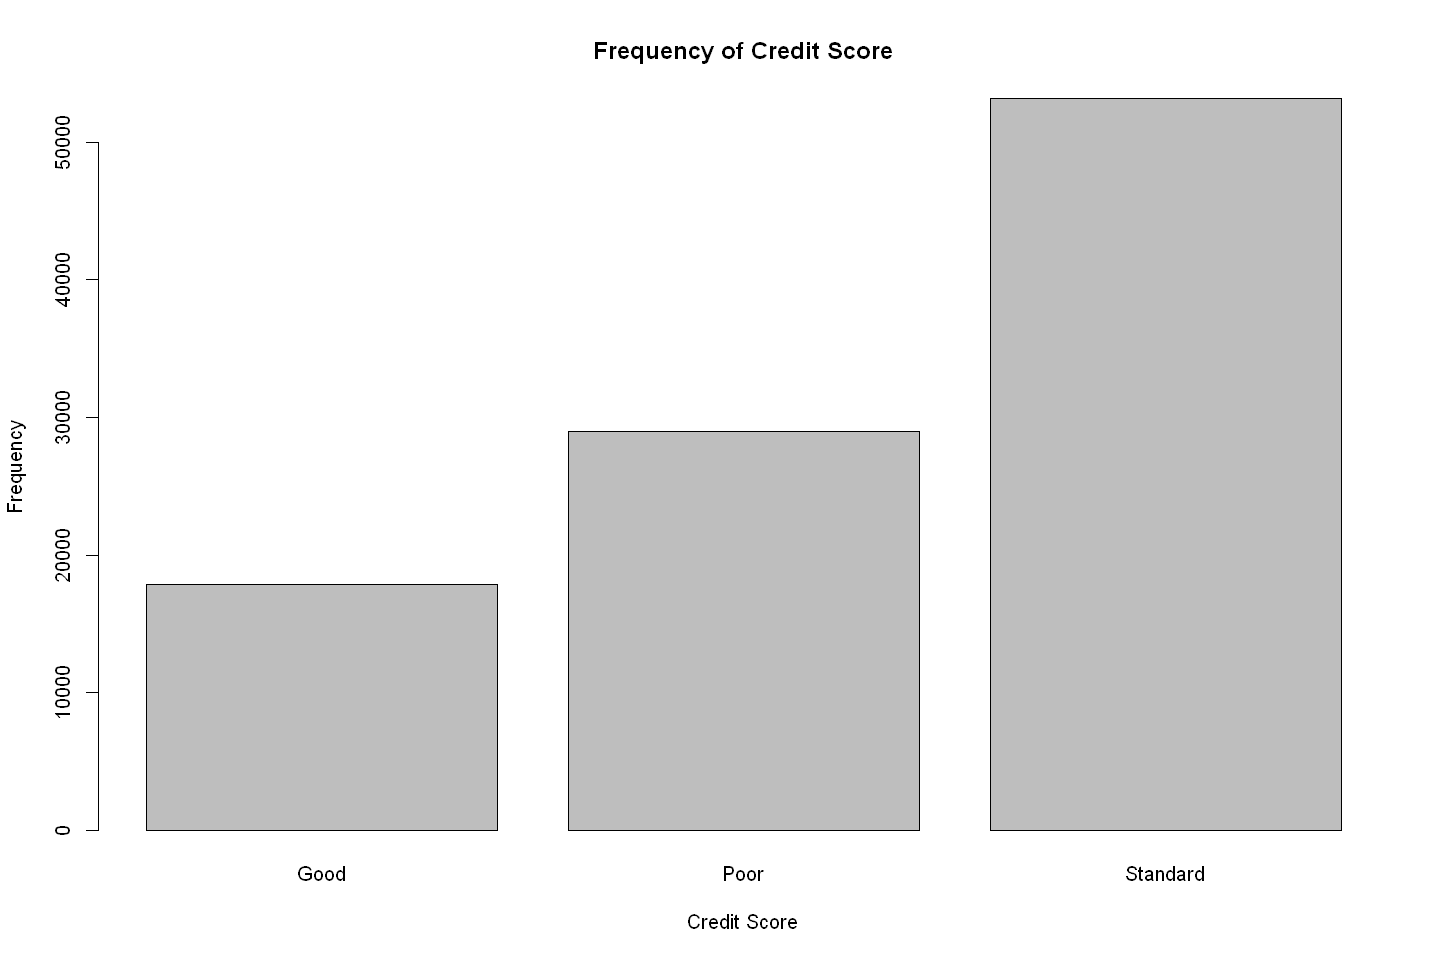

In [60]:
barplot(table(df$Credit_Score), 
        main="Frequency of Credit Score", 
        xlab="Credit Score", 
        ylab="Frequency")


environ 19 000 observations avec un score de crédit considéré comme bon.
Poor (mauvais) :  environ 30 000 observations avec un score de crédit considéré comme mauvais.
Standard (standard) :  plus de 50 000 observations avec un score de crédit considéré comme standard.
Cela indique une répartition inégale des scores de crédit dans notre ensemble de données, avec une majorité de scores standard, suivis de scores considérés comme mauvais, et enfin un nombre relativement plus faible de scores considérés comme bons.

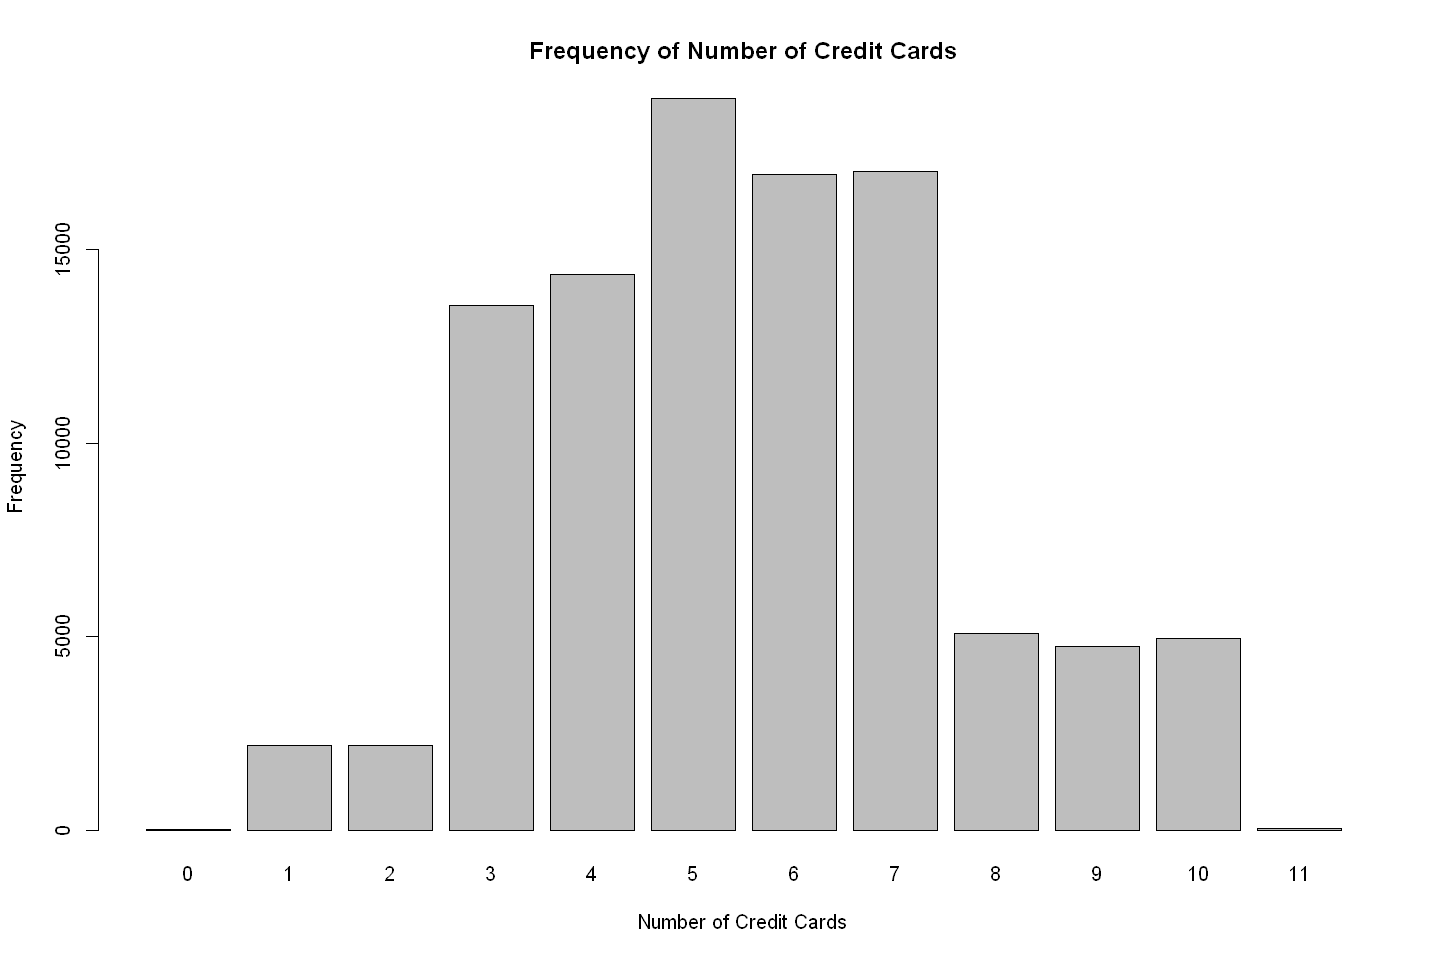

In [61]:
barplot(table(df$Num_Credit_Card), 
        main="Frequency of Number of Credit Cards", 
        xlab="Number of Credit Cards", 
        ylab="Frequency")

la majorité des clients ont de 3 à 7 cartes crédits

### Analyse bivarié

In [62]:
install.packages("dplyr")
library(dplyr)

# Select only numeric columns
numeric_df <- select_if(df, is.numeric)

# Calculate the correlation matrix
correlation_matrix <- cor(numeric_df)

# Identify columns with high positive correlation
positively_correlated <- which(correlation_matrix > 0.7 & correlation_matrix < 1, arr.ind = TRUE)

# Identify columns with high negative correlation
negatively_correlated <- which(correlation_matrix < -0.7 & correlation_matrix > -1, arr.ind = TRUE)

# Print the positively correlated column pairs
print("Positively correlated column pairs:")
print(positively_correlated)

# Print the negatively correlated column pairs
print("Negatively correlated column pairs:")
print(negatively_correlated)


Warning message:
"le package 'dplyr' est en cours d'utilisation et ne sera pas installé"


[1] "Positively correlated column pairs:"
                        row col
Monthly_Inhand_Salary     7   6
Amount_invested_monthly  20   6
Annual_Income             6   7
Amount_invested_monthly  20   7
Annual_Income             6  20
Monthly_Inhand_Salary     7  20
[1] "Negatively correlated column pairs:"
     row col


on conclut que:
Monthly_Inhand_Salary and Annual_Income
Amount_invested_monthly and Monthly_Inhand_Salary
Amount_invested_monthly and Annual_Income
sont positivement correlés

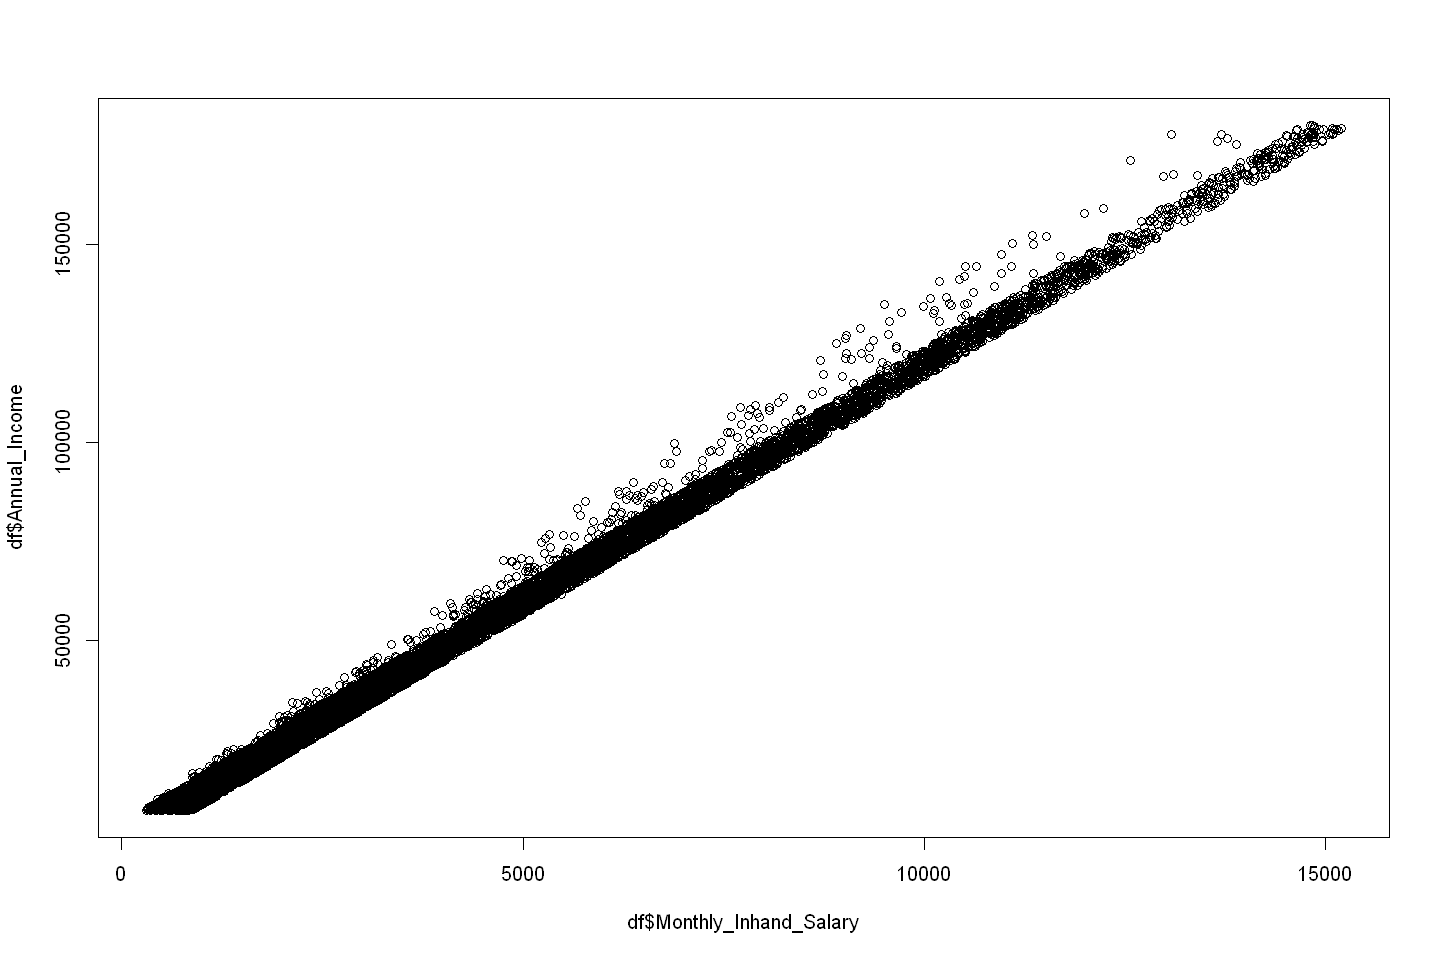

In [63]:
plot(x=df$Monthly_Inhand_Salary,y=df$Annual_Income)

il ya une corrélation  positive forte entre le salaire mensuel et le revenue annuel ce qui est logique

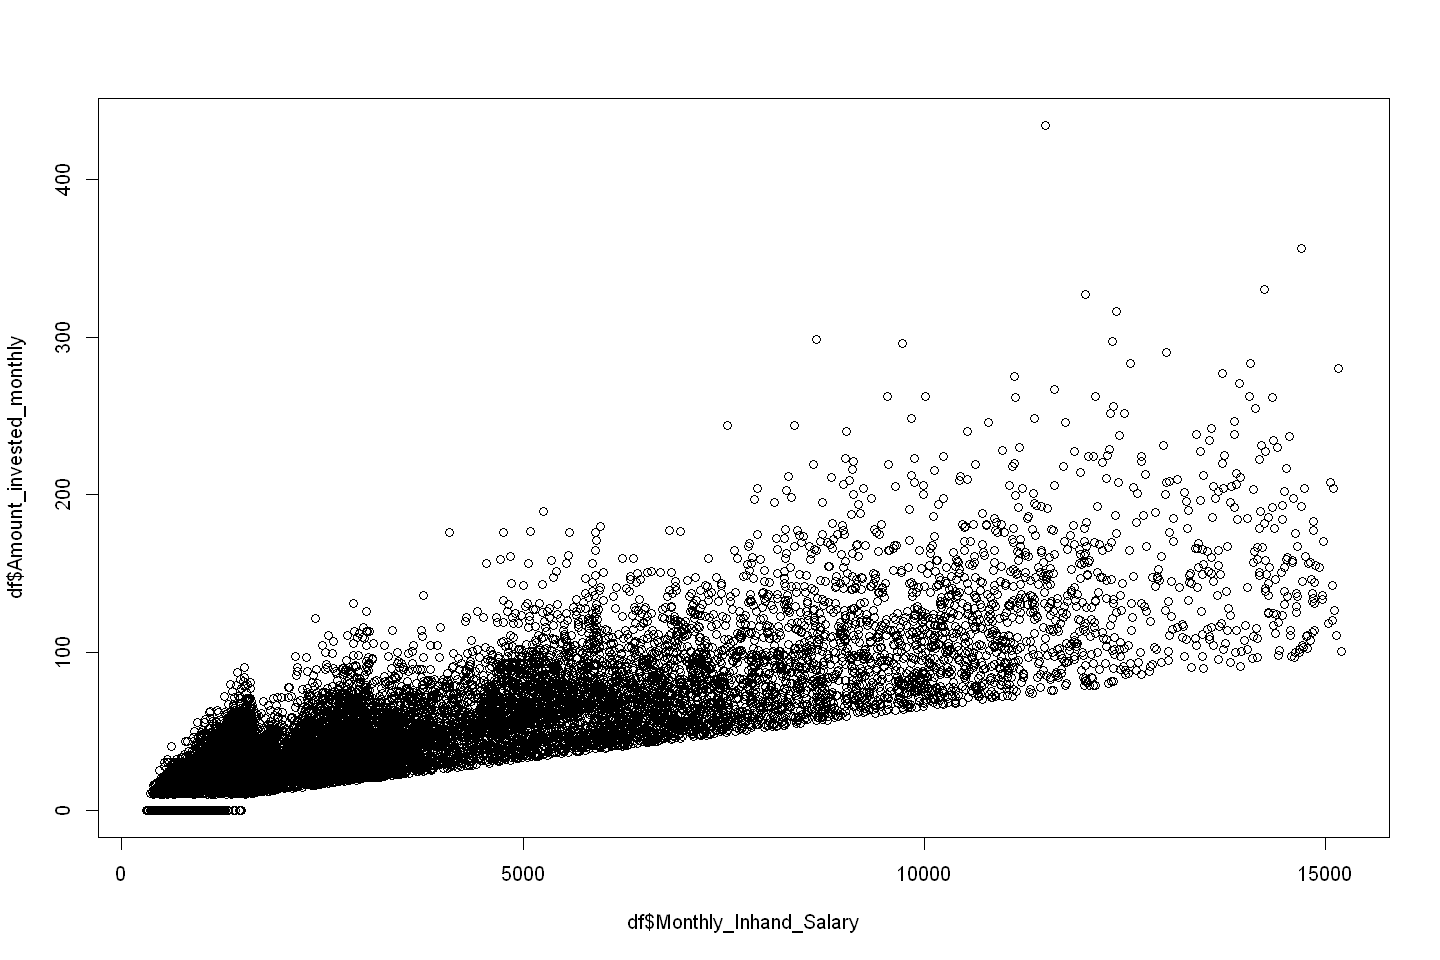

In [64]:
plot(x=df$Monthly_Inhand_Salary,y=df$Amount_invested_monthly)

j'ai une corrélation positive forte entre le salaire mensuel et le montant investi mensuel

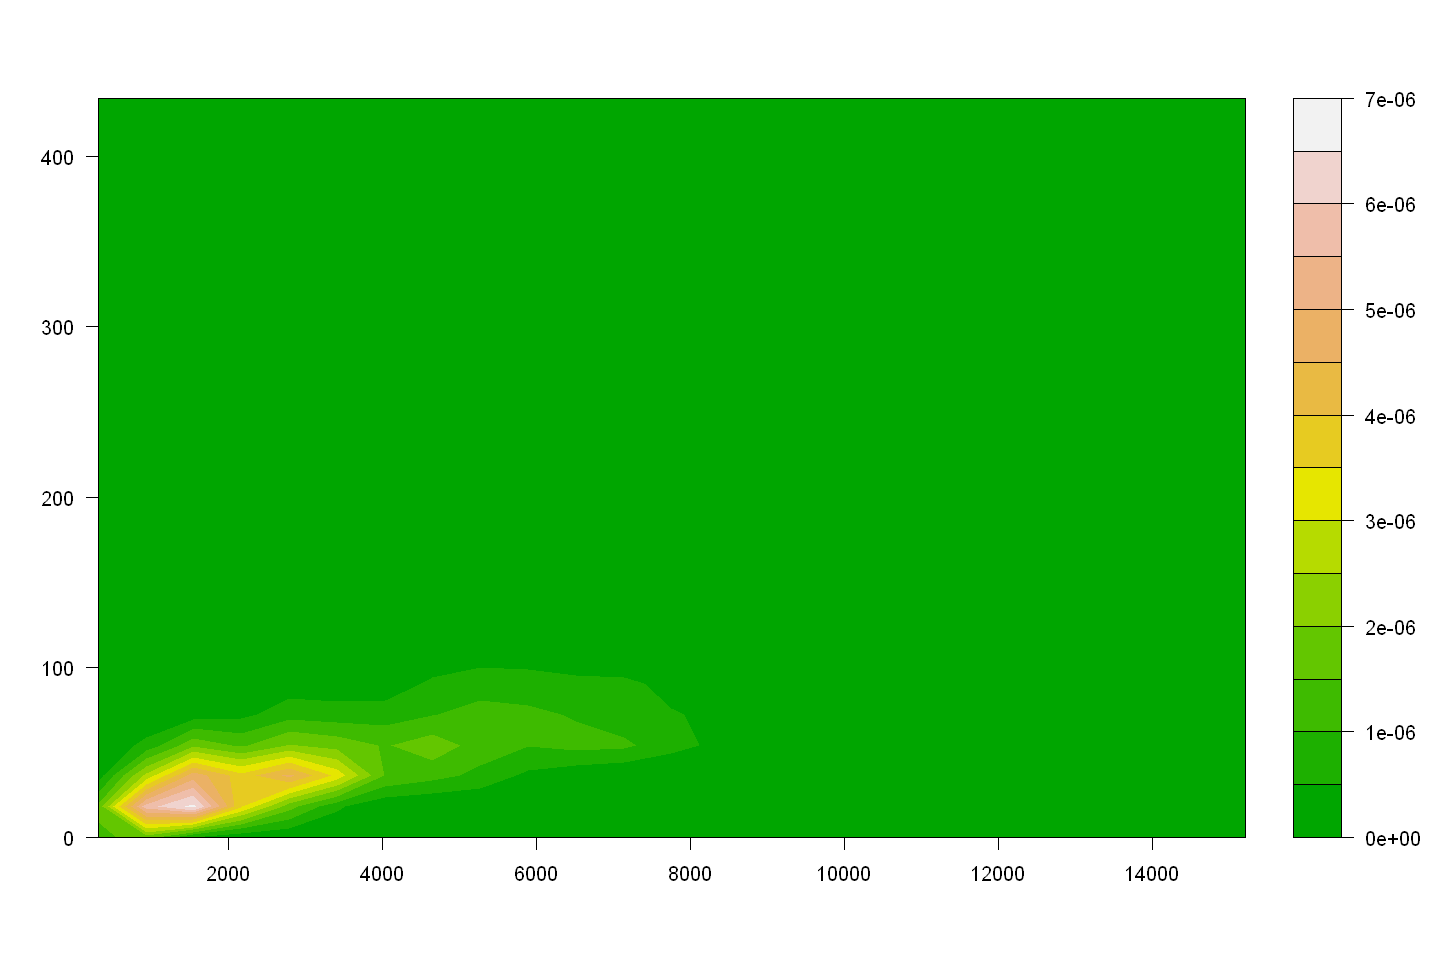

In [65]:
library(MASS)
tmp = df[, c("Monthly_Inhand_Salary", "Amount_invested_monthly")]
tmp = tmp[complete.cases(tmp), ]
filled.contour(kde2d(tmp$Monthly_Inhand_Salary, tmp$Amount_invested_monthly), color =terrain.colors)

il ya  une concentration forte au dessous à gauche

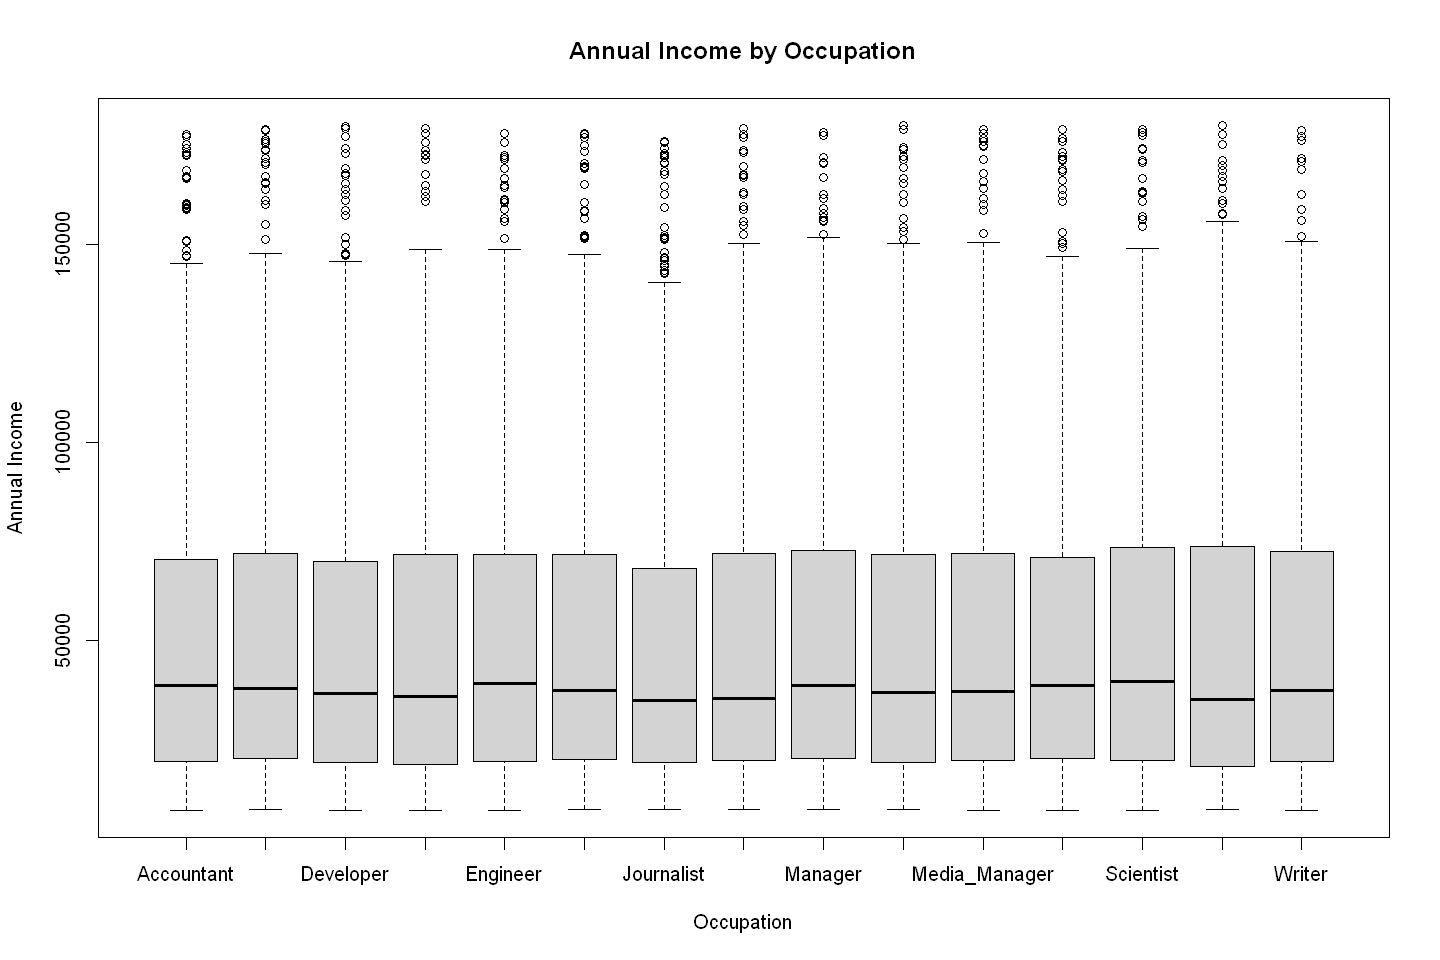

In [66]:
boxplot(df$Annual_Income ~ df$Occupation, df=df, main="Annual Income by Occupation", xlab="Occupation", ylab="Annual Income")

Analyse de résultat: 
Comptable : La médiane semble être autour de 40000, mais il y a plusieurs valeurs aberrantes au-dessus de ce seuil, indiquant une grande variabilité dans les revenus annuels des comptables. Certains comptables gagnent considérablement plus que la médiane.
Médecin : La médiane est d'environ 3500, mais il y a également des valeurs aberrantes au-dessus de ce seuil. Cependant, la variabilité semble moins prononcée que pour les comptables.
Journaliste : La médiane est d'environ 3000, avec quelques valeurs aberrantes au-dessus de ce seuil. La distribution semble être moins étalée que pour les comptables et les médecins.
Mécanicien : La médiane est également d'environ 3000, avec quelques valeurs aberrantes au-dessus de ce seuil. La dispersion des revenus semble similaire à celle des journalistes.
Scientifique : La médiane semble être autour de 4000, avec quelques valeurs aberrantes au-dessus de ce seuil. La dispersion des revenus semble être similaire à celle des comptables.
Écrivain : La médiane est d'environ 3500, avec quelques valeurs aberrantes au-dessus de ce seuil. La distribution semble être similaire à celle des journalistes et des mécaniciens.
Interprétation :

Les valeurs aberrantes observées dans tous les boxplots indiquent une grande variabilité des revenus annuels au sein de chaque profession.
Certaines professions, comme les comptables et les scientifiques, semblent avoir une dispersion plus importante des revenus, avec un plus grand nombre de valeurs aberrantes.
Les médecins semblent avoir une dispersion relativement moins prononcée des revenus par rapport aux autres professions.

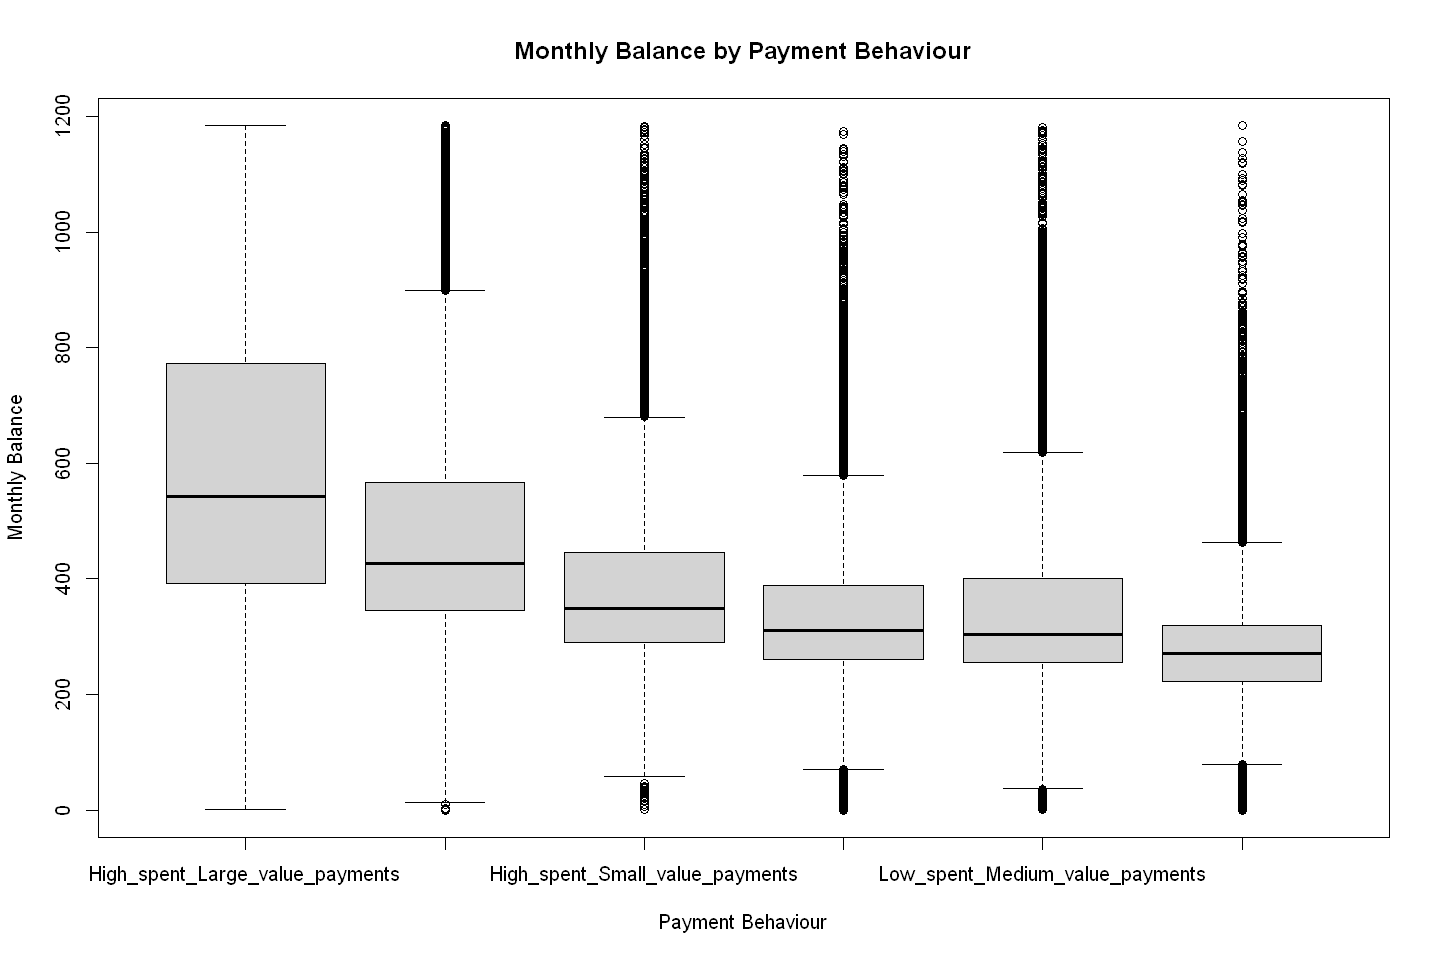

In [67]:
boxplot(df$Monthly_Balance ~ df$Payment_Behaviour, data=df, main="Monthly Balance by Payment Behaviour", xlab="Payment Behaviour", ylab="Monthly Balance")

High Spent, Large Value Payments : Ce groupe montre une médiane autour de 590, avec une boîte s'étendant principalement entre 400 et 800. Cela indique que la majorité des clients ayant un comportement de paiement caractérisé par des dépenses élevées et de gros paiements ont un solde mensuel relativement élevé, avec une dispersion modérée autour de la médiane. Il n'y a pas beaucoup de valeurs aberrantes, ce qui suggère une cohérence dans le solde mensuel pour ce groupe.
Spent Medium Value Payments : Pour ce groupe, la médiane se situe autour de 300, avec une boîte principalement entre 200 et 300. Cela indique que la majorité des clients avec un comportement de paiement caractérisé par des dépenses de valeur moyenne ont un solde mensuel plus bas en comparaison avec le groupe précédent. La dispersion semble également moins importante, avec moins de valeurs aberrantes
En résumé, ces observations suggèrent qu'il existe une relation entre le comportement de paiement des clients et leur solde mensuel. Les clients qui ont tendance à effectuer des dépenses plus importantes et à faire des paiements de grande valeur ont généralement un solde mensuel plus élevé, tandis que ceux qui ont des dépenses de valeur moyenne ont un solde mensuel plus bas. Cela peut avoir des implications importantes pour la gestion des finances personnelles et des risques de crédit.

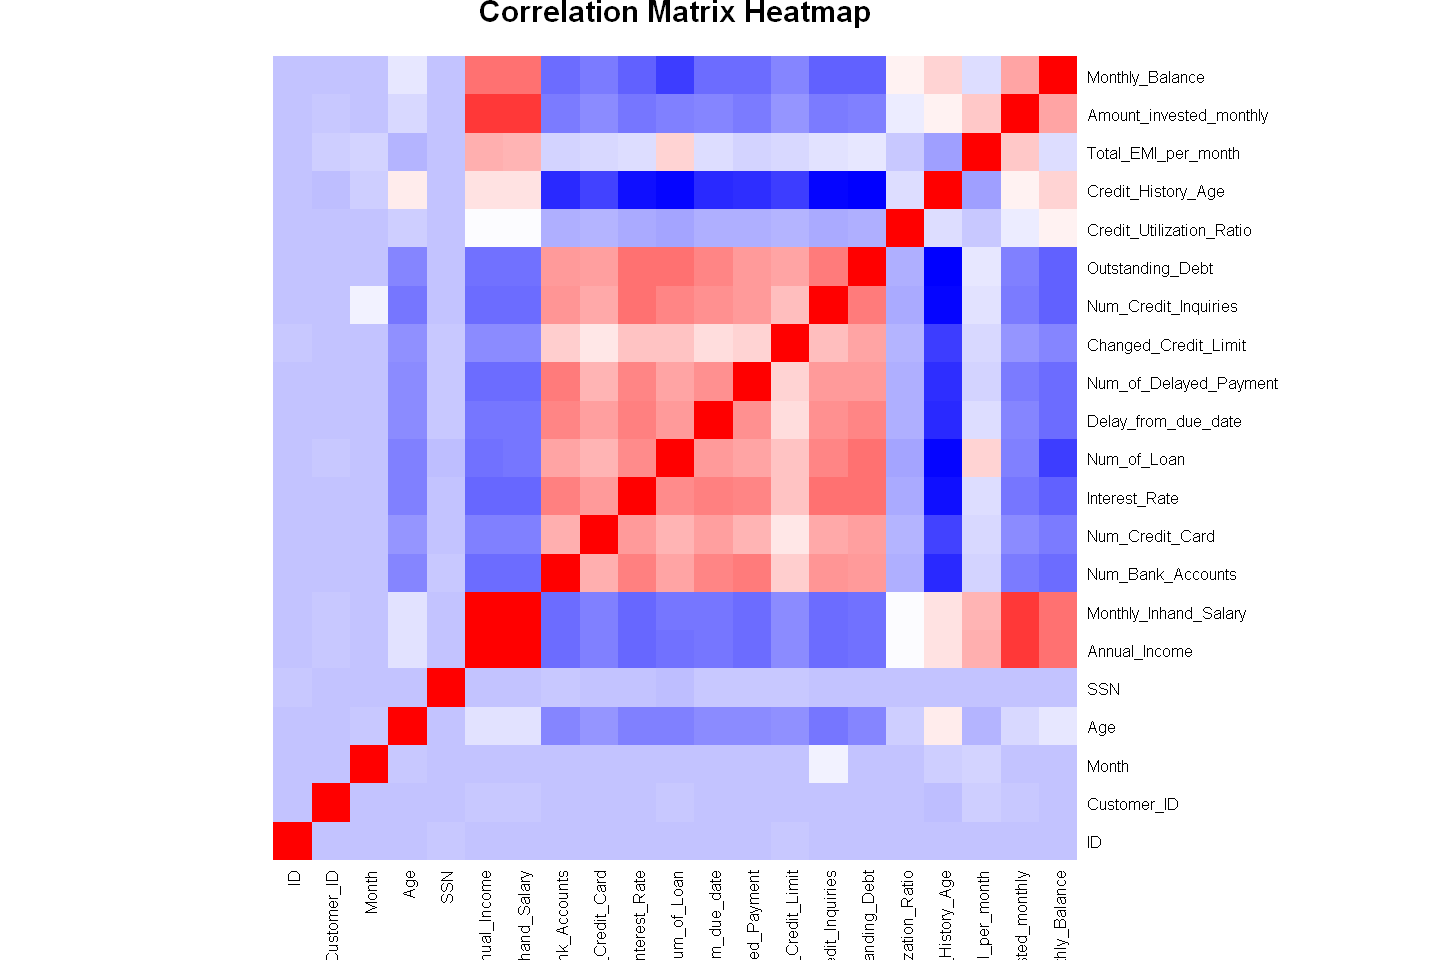

In [68]:
numeric_df <- df[sapply(df, is.numeric)]
correlation_matrix <- cor(numeric_df)
 heatmap(correlation_matrix, 
       Rowv = NA, 
      Colv = NA,
      col = colorRampPalette(c("blue", "white", "red"))(100),
      scale = "none",
      main = "Correlation Matrix Heatmap")

Voici une interprétation des zones de couleur :

Rouge foncé : Les zones rouges foncées indiquent une forte corrélation positive entre les paires de variables correspondantes. Par exemple, entre monthly_inhaded et ited_monthly, annual_income et monthly_inhaded, hly_balance et monthly_inhaded, annual_income et hly_balance. Cela suggère que lorsque l'une de ces variables augmente, l'autre a tendance à augmenter également, et vice versa.
Rose : Les zones roses représentent une corrélation positive moins forte mais toujours significative entre les paires de variables. Ces corrélations sont moins fortes que celles représentées en rouge foncé mais restent positives.
En revanche, les zones de couleur bleue, cela indiquerait une corrélation négative, ce qui signifie que lorsque l'une des variables augmente, l'autre a tendance à diminuer, et vice versa. Les zones blanches, cela indique une corrélation faible ou nulle entre les variables correspondantes.

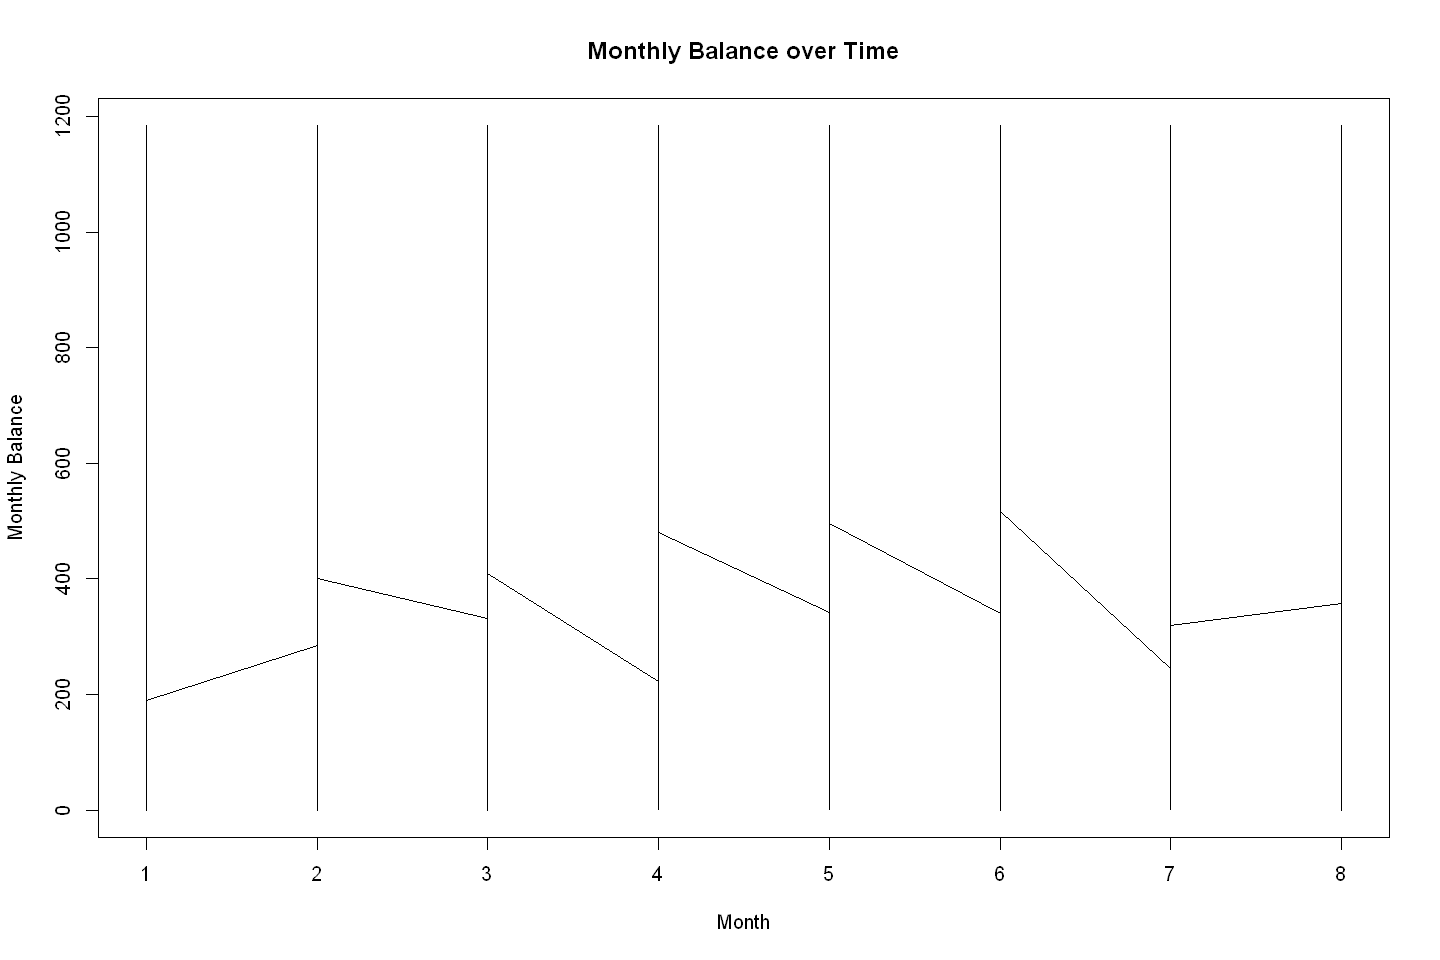

In [69]:
# Sort the data by 'Month' column
df <- df[order(df$Month), ]
# Plot Monthly_Balance over time
plot(df$Month, df$Monthly_Balance, type="l", main="Monthly Balance over Time", xlab="Month", ylab="Monthly Balance")

Tendance générale : La tendance générale semble fluctuer avec des valeurs variables au fil des mois. Il y a des périodes où le solde mensuel semble relativement stable, tandis que d'autres périodes montrent des variations plus prononcées.
Fluctuations saisonnières : Il peut y avoir des fluctuations saisonnières dans le solde mensuel, où certaines périodes de l'année présentent des soldes plus élevés ou plus bas. Par exemple, vous pouvez remarquer des pics ou des creux à certains mois de l'année.
Points atypiques : Vous pouvez également remarquer la présence de points atypiques ou d'extrêmes dans le solde mensuel, indiquant des mois où le solde est exceptionnellement élevé ou bas. Ces points atypiques pourraient être dus à des événements spécifiques ou des transactions inhabituelles.
Tendance générale de croissance ou de décroissance : En examinant la trajectoire générale du solde mensuel au fil du temps, vous pouvez essayer de déterminer s'il y a une tendance de croissance ou de décroissance à long terme. Cela pourrait avoir des implications importantes pour la gestion financière ou les prévisions futures.
En analysant ces tendances et en identifiant les facteurs qui influent sur le solde mensuel, vous pouvez obtenir des informations précieuses sur la santé financière globale, les habitudes de dépenses et les schémas de revenus des individus ou de l'organisation.

# les Tests

In [70]:
#relation entre creditscore et les autres variables qualitatives:
chisq.test (df$Credit_Score, df$Occupation)


	Pearson's Chi-squared test

data:  df$Credit_Score and df$Occupation
X-squared = 180.69, df = 28, p-value < 2.2e-16


Analyse de résultat: X-squared (χ²) : La valeur de chi carré obtenue est de 180.69. Degrés de liberté (df) : Le nombre de degrés de liberté est de 28. p-value : La valeur de p est inférieure à 2.2e-16, ce qui est très proche de zéro. Interprétation :

La valeur de p très faible (p-value < 2.2e-16) suggère que la relation entre la variable "Occupation" et "Credit_Score" est statistiquement significative. Autrement dit, il y a une association significative entre ces deux variables.

In [71]:
chisq.test (df$Credit_Score, df$Payment_Behaviour)


	Pearson's Chi-squared test

data:  df$Credit_Score and df$Payment_Behaviour
X-squared = 1546.2, df = 10, p-value < 2.2e-16


Analyse de résultat: 
X-squared : La statistique du test du Chi-deux (χ²) de Pearson est de 1546.2.
df : Les degrés de liberté associés au test sont de 10.
p-value : La p-value est très faible, inférieure à 2.2e-16.
Interprétation :

Comme la p-value est très faible (p-value < 0.05), on rejette l'hypothèse nulle selon laquelle il n'y a pas de relation entre les variables "Credit_Score" et "Payment_Behaviour".
Cela suggère qu'il existe une association significative entre le score de crédit et le comportement de paiement.
En d'autres termes, le score de crédit semble être lié au comportement de paiement des individus.

In [81]:
 chisq.test (df$Credit_Score, df$Credit_Mi)


	Pearson's Chi-squared test

data:  df$Credit_Score and df$Credit_Mi
X-squared = 40489, df = 4, p-value < 2.2e-16


Analyse de résultat: 
X-squared (χ²) : La valeur de chi carré obtenue est de 40489.
Degrés de liberté (df) : Le nombre de degrés de liberté est de 4.
p-value : La valeur de p est inférieure à 2.2e-16, ce qui est très proche de zéro.
Interprétation :

Comme la valeur de p est extrêmement faible (p-value < 2.2e-16), cela suggère une forte association statistique entre la variable "Credit_Score" et la variable "Credit_Mi".

## Modèle ML

In [72]:
# Installer et charger le package 'caret' pour la fonction train_test_split
install.packages("caret")
library(caret)


Installation du package dans 'C:/Users/elabo/AppData/Local/R/win-library/4.3'
(car 'lib' n'est pas spécifié)



le package 'caret' a été décompressé et les sommes MD5 ont été vérifiées avec succés

Les packages binaires téléchargés sont dans
	C:\Users\elabo\AppData\Local\Temp\RtmpsjSBrq\downloaded_packages


Warning message:
"le package 'caret' a été compilé avec la version R 4.3.3"
Le chargement a nécessité le package : ggplot2

Warning message:
"le package 'ggplot2' a été compilé avec la version R 4.3.3"
Le chargement a nécessité le package : lattice



In [73]:
install.packages("randomForest")
library(randomForest)

Installation du package dans 'C:/Users/elabo/AppData/Local/R/win-library/4.3'
(car 'lib' n'est pas spécifié)



le package 'randomForest' a été décompressé et les sommes MD5 ont été vérifiées avec succés

Les packages binaires téléchargés sont dans
	C:\Users\elabo\AppData\Local\Temp\RtmpsjSBrq\downloaded_packages


Warning message:
"le package 'randomForest' a été compilé avec la version R 4.3.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : 'randomForest'


L'objet suivant est masqué depuis 'package:ggplot2':

    margin


L'objet suivant est masqué depuis 'package:dplyr':

    combine




In [74]:
# Diviser les données en ensembles d'entraînement et de test
set.seed(42)  # pour la reproductibilité
split <- createDataPartition(df$Credit_Score, p = 0.7, list = FALSE)
train_data <- df[split, ]
test_data <- df[-split, ]

In [75]:
# Séparer les variables indépendantes et dépendantes
x_train <- train_data[, c('Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age', 'Monthly_Balance')]
y_train <- train_data$Credit_Score
x_test <- test_data[, c('Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age', 'Monthly_Balance')]
y_test <- test_data$Credit_Score

In [76]:
# Créer et entraîner le modèle RandomForestClassifier
model <- randomForest(x = x_train, y = y_train, ntree = 150, nodesize = 1)

In [77]:
# Prédire avec le modèle entraîné
predictions <- predict(model, newdata = x_test)

In [78]:
# Évaluer le modèle
accuracy <- sum(predictions == y_test) / length(predictions)
print(paste("Accuracy:", accuracy))

[1] "Accuracy: 0.808593619787326"


In [79]:
# Tester le modèle avec de nouvelles données
new_data <- data.frame(Annual_Income = 20000, 
                       Monthly_Inhand_Salary = 3000, 
                       Num_Bank_Accounts = 5, 
                       Num_Credit_Card = 3, 
                       Interest_Rate = 3, 
                       Num_of_Loan = 4, 
                       Delay_from_due_date = 3, 
                       Num_of_Delayed_Payment = 8, 
                       Outstanding_Debt = 1000.25, 
                       Credit_History_Age = 300, 
                       Monthly_Balance = 400)
predicted_credit_score <- predict(model, newdata = new_data)
print(paste("Predicted Credit Score:", predicted_credit_score))

[1] "Predicted Credit Score: Good"


In [80]:
# Tester le modèle avec de nouvelles données
new_data <- data.frame(Annual_Income = 2000, 
                       Monthly_Inhand_Salary = 300, 
                       Num_Bank_Accounts = 1, 
                       Num_Credit_Card = 3, 
                       Interest_Rate = 3, 
                       Num_of_Loan = 4, 
                       Delay_from_due_date = 3, 
                       Num_of_Delayed_Payment = 8, 
                       Outstanding_Debt = 10000.25, 
                       Credit_History_Age = 20, 
                       Monthly_Balance = 400)
predicted_credit_score <- predict(model, newdata = new_data)
print(paste("Predicted Credit Score:", predicted_credit_score))

[1] "Predicted Credit Score: Standard"
